In [3]:
pip install xlrd

#Structural Validation

In [1]:
#READING THE FILE
import pandas as pd
from datetime import datetime, timedelta

dataset_df = pd.read_excel(r'C:\Users\Admin\Downloads\Analyst case study dataset 1.xls', engine='xlrd')

In [2]:
dataset_df.shape

(3021, 24)

In [3]:
dataset_df.columns

Index(['LeadCreated', 'FirstName', 'Email', 'VendorLeadID', 'CallStatus',
       'WidgetName', 'PublisherZoneName', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'IP Address', 'Partner', 'ReferralDomain',
       'MarketingCampaign', 'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters'],
      dtype='object')

In [4]:
#Getting unique values in each column & Number of Null Values for each column
print("Unique values in each column:")
for col in dataset_df.columns:
    unique_values = dataset_df[col].nunique()
    print(f"Column '{col}': {unique_values}")

print("\nNumber of null values in each column:")
null_counts = dataset_df.isnull().sum()
print(null_counts)

# Percentage of missing or null values per column
null_percent = (dataset_df.isnull().sum() / len(dataset_df)) * 100
print(null_percent.sort_values(ascending=False))

Unique values in each column:
Column 'LeadCreated': 2786
Column 'FirstName': 1695
Column 'Email': 2888
Column 'VendorLeadID': 3012
Column 'CallStatus': 7
Column 'WidgetName': 14
Column 'PublisherZoneName': 2
Column 'PublisherCampaignName': 2
Column 'AddressScore': 5
Column 'PhoneScore': 5
Column 'AdvertiserCampaignName': 2
Column 'State': 32
Column 'DebtLevel': 10
Column 'IP Address': 0
Column 'Partner': 6
Column 'ReferralDomain': 372
Column 'MarketingCampaign': 20
Column 'AdGroup': 103
Column 'Keyword': 285
Column 'SearchQuery': 961
Column 'ReferralURL': 670
Column 'ReferralURL Parameters': 2199
Column 'LandingPageURL': 5
Column 'Landing Page URL Parameters': 1090

Number of null values in each column:
LeadCreated                       0
FirstName                         0
Email                             0
VendorLeadID                      8
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0

In [5]:
#looking at random samples of LeadCreated
print(dataset_df['LeadCreated'].tail(10))

3011   2009-07-28 16:21:11.700
3012   2009-07-15 11:34:55.000
3013   2009-06-16 21:34:43.247
3014   2009-04-03 09:37:31.323
3015   2009-08-17 21:12:20.850
3016   2009-06-30 18:14:33.043
3017   2009-04-25 16:56:53.670
3018   2009-04-12 18:38:43.067
3019   2009-09-23 21:41:08.193
3020   2009-04-27 10:31:42.573
Name: LeadCreated, dtype: datetime64[ns]


In [6]:
dataset_df['LeadCreated'] = pd.to_datetime(dataset_df['LeadCreated'])
print(dataset_df['LeadCreated'].dtype)

datetime64[ns]


In [7]:
#checking for any duplicate vendorleadid as this is our primary key! 
duplicate_leads = dataset_df[dataset_df.duplicated(subset=['VendorLeadID'], keep=False)]
print(f"Total duplicate VendorLeadIDs are: {duplicate_leads['VendorLeadID'].nunique()}")

Total duplicate VendorLeadIDs are: 1


In [8]:
#case 1 -> verifying duplicate vendorleadids: different callstatus for same ID
dup_diff_status = duplicate_leads.groupby(['VendorLeadID'])['CallStatus'].nunique()
diff_status_ids = dup_diff_status[dup_diff_status > 1]
print(f"IDs with multiple Call Status values: {len(diff_status_ids)}")

#case 2 -> verifying if its a full row duplicate
full_row_duplicates = dataset_df.duplicated(keep=False).sum()
print(f"Total full row duplicates are: {full_row_duplicates}")

IDs with multiple Call Status values: 0
Total full row duplicates are: 0


In [9]:
#showing the duplicated VendorLeadID values and their rows
if not duplicate_leads.empty:
    print("Duplicated VendorLeadID(s) and corresponding rows:\n")
    print(duplicate_leads.sort_values('VendorLeadID'))
else:
    print("No duplicated VendorLeadIDs found.")

Duplicated VendorLeadID(s) and corresponding rows:

                 LeadCreated FirstName                     Email  \
2936 2009-05-08 17:15:23.293       Jay      jay.chalmers@att.net   
2937 2009-05-08 17:58:24.383       Jay      jay.chalmers@att.net   
297  2009-04-21 00:00:00.000       Ann  arosier@proassurance.com   
320  2009-07-01 13:31:08.000    Daniel          vashersr@aol.com   
458  2009-08-30 16:41:19.000     Carla     cpickrace@hotmail.com   
777  2009-06-20 15:17:23.000      Tina     shortietg04@yahoo.com   
800  2009-08-19 00:00:00.000       Jim  jimsvihjla@earthlink.net   
1216 2009-06-08 09:33:06.000     Kelly        burtonk3@gmail.com   
1490 2009-06-19 23:56:27.000    Evelyn      EJensen105@yahoo.com   
2418 2009-05-17 00:00:00.000    Teresa     teresa_choa@yahoo.com   

                              VendorLeadID  \
2936  33469916-C227-4A8F-BAAB-D70F7974315B   
2937  33469916-C227-4A8F-BAAB-D70F7974315B   
297                                    NaN   
320            

In [10]:
#creating a flag for anomalous VendorLeadIDs
dataset_df['VendorLeadID_Anomaly'] = dataset_df['VendorLeadID'].duplicated(keep=False)

dataset_df[dataset_df['VendorLeadID_Anomaly']]


,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,VendorLeadID_Anomaly
297,2009-04-21 00:00:00.000,Ann,arosier@proassurance.com,NaN,Closed,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,guide.opendns.com,DebtReductionInc,Debt Credit Services,NaN,NaN,http://guide.opendns.com/controller.php,url=credit services&client=ie7&ref=,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,True
320,2009-07-01 13:31:08.000,Daniel,vashersr@aol.com,NaN,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,NaN,2.0,...,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-6478277329169103&dt=124647297093...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,True
458,2009-08-30 16:41:19.000,Carla,cpickrace@hotmail.com,NaN,Contacted - Invalid Profile,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,5.0,2.0,...,googleads.g.doubleclick.net,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-4962658429099166&output=html&h=1...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,True
777,2009-06-20 15:17:23.000,Tina,shortietg04@yahoo.com,NaN,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,www.ask.com,Debt General,Loan Default,Loan default help,financial help to pay a defalted college loan,http://www.ask.com/web,q=financial help to pay a defalted college loa...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=L...,True
800,2009-08-19 00:00:00.000,Jim,jimsvihjla@earthlink.net,NaN,EP Confirmed,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,search.earthlink.net,Debt Holding Tank,Holding Tank - Debt,Debt rescue usa,debt rescue usa,http://search.earthlink.net/search,q=debt rescue usa&channel=webmail,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,True
1216,2009-06-08 09:33:06.000,Kelly,burtonk3@gmail.com,NaN,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,wwww.citibankstudentloan.com,DebtReductionInc,Student Debt,NaN,NaN,http://wwww.citibankstudentloan.com/,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,True
1490,2009-06-19 23:56:27.000,Evelyn,EJensen105@yahoo.com,NaN,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,NaN,NaN,...,search.yahoo.com,DebtReductionInc - YSM Restructure (05/29/09),General Debt (LV),NaN,pay off debt,http://search.yahoo.com/search,p=pay off debt&fr=yfp-t-501&toggle=1&cop=mss&e...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,True
2418,2009-05-17 00:00:00.000,Teresa,teresa_choa@yahoo.com,NaN,EP Confirmed,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,search.yahoo.com,DebtReductionInc,General Debt,NaN,www.debt free.com,http://search.yahoo.com/search,p=www.debt free.com&fr=ush1-mail&xargs=12KPjg1...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,True
2936,2009-05-08 17:15:23.293,Jay,jay.chalmers@att.net,33469916-C227-4A8F-BAAB-D70F7974315B,NaN,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,www.matchpoint.com,state,Debt Counseling,NaN,NaN,http://www.matchpoint.com/business/San-Diego/C...,NaN,http://www.debtreductioninc.com/index8.

#Audit Log Creation for Structural Validation

In [11]:
#intializing empty audit log
audit_log = pd.DataFrame(columns = ['Step', 'Check', 'Issue Found', 'Action Taken', 'No. of Rows Affected'])

#Loading Data
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'Load Data',
    'Check': 'Column names and count',
    'Issue Found': 'All correct',
    'Action Taken': 'None',
    'No. of Rows Affected': 0
}])], ignore_index=True)

#Date Formatting 
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'Date Format',
    'Check': 'LeadCreated consistency',
    'Issue Found': 'All OK',
    'Action Taken': 'Converted to datetime',
    'No. of Rows Affected': 0
}])], ignore_index=True)

#VendorLeadID duplicates / anomalies
num_dup_ids = dataset_df['VendorLeadID'].duplicated(keep=False).sum()
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'VendorLeadID Validation',
    'Check': 'Duplicate / invalid IDs',
    'Issue Found': f'{num_dup_ids} row(s) with duplicate VendorLeadID',
    'Action Taken': 'Flagged for review',
    'No. of Rows Affected': num_dup_ids
}])], ignore_index=True)

#Nulls / missing values
null_counts = dataset_df.isnull().sum().sum()
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'Missing Values',
    'Check': 'Check for null / missing data',
    'Issue Found': f'Total nulls across dataset: {null_counts}',
    'Action Taken': 'Will handle during cleaning',
    'No. of Rows Affected': null_counts
}])], ignore_index=True)

audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757


#Identity & Repetition Checks

In [12]:
#Creating Userkey = Concat(FirstName, Email)
dataset_df['UserKey'] = dataset_df['FirstName'].str.strip().str.lower() + "|" + dataset_df['Email'].str.strip().str.lower()

#Counting total & unique users in the dataset
total_leads = len(dataset_df)
unique_users = dataset_df['UserKey'].nunique()
repeated_users = total_leads - unique_users

print(f"Total leads: {total_leads}")
print(f"Total Unique Users: {unique_users}")
print(f"Total Repeated Users: {repeated_users}")

#flagging repeated users for later analysis 
dataset_df['RepeatedUser'] = dataset_df.duplicated(subset=['UserKey'],keep=False)

Total leads: 3021
Total Unique Users: 3000
Total Repeated Users: 21


#Audit Log Creation for identity & Repetition Checks

In [13]:
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'User Identity Check',
    'Check': 'FirstName + Email concatenation to detect repeated users',
    'Issue Found': f'{repeated_users} repeated users detected',
    'Action Taken': 'Created UserKey; flagged repeated users',
    'No. of Rows Affected': repeated_users
}])], ignore_index=True)


In [14]:
#audit_log = audit_log.drop([4],axis=0)
#audit_log.reset_index(inplace=True)
#audit_log.drop(columns=['level_0','index'],inplace=True)
audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757
4,User Identity Check,FirstName + Email concatenation to detect repe...,21 repeated users detected,Created UserKey; flagged repeated users,21


#Lead Quality Categorization

In [15]:
dataset_df['CallStatus'].unique()

array([nan, 'Unable to contact - Bad Contact Information',
       "Contacted - Doesn't Qualify", 'Closed', 'EP Received',
       'EP Confirmed', 'Contacted - Invalid Profile', 'EP Sent'],
      dtype=object)

In [16]:
#Cleaning/Replacing blanks in callstatus column 
import numpy as np
dataset_df['CallStatus'] = dataset_df['CallStatus'].replace(r'^\s*$',np.nan,regex=True)
dataset_df['CallStatus'] = dataset_df['CallStatus'].fillna('Unknown')

dataset_df[dataset_df['CallStatus'] == 'Unknown']

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,VendorLeadID_Anomaly,UserKey,RepeatedUser
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,False,dorinda|kanani@sandwichisles.net,False
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,False,presetta|clerk2@ustconline.net,False
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,False,stephanie|sr1lambert@embarqmail.com,False
5,2009-07-29 14:50:06.657,diana,diana.powers@tirecenters.com,94AB0C2C-0DEA-4B5D-96FA-94AE6C470CA0,Unknown,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-9336631000664321&dt=124889666347...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,False,diana|diana.powers@tirecenters.com,False
6,2009-07-06 11:50:41.210,kyla,kmcmillion@live.com,26583F6E-49B5-47B8-96E1-A321CAF09B7A,Unknown,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,4.0,...,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-4461215404735941&dt=124689889799...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,False,kyla|kmcmillion@live.com,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2009-06-30 18:14:33.043,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,Unknown,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,False,amy|ahokett@sjc.edu,False
3017,2009-04-25 16:56:53.670,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,False,brandy|brandy75137@yahoo.com,False
3018,2009-04-12 18:38:43.067,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,Unknown,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,False,jennifer|jennifer_woods48375@yahoo.com,False
3019,2009-09-23 21:41:08.193,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,Unknown,w-302252-DebtReduction1-1DC-yellowarrow-dark,TopLeft-302252,DebtReductionInc,5.0,5.0,...,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreduction

In [17]:
#Creating lead quality bucket mapping 
lead_quality_map = {
    'Closed':'High',
    'EP Confirmed':'Medium-High',
    'EP Received':'Medium',
    'EP Sent':'Medium-Low',
    'Unable to contact - Bad Contact Information':'Low',
    'Contacted - Doesn\'t Qualify':'Low',
    'Contacted - Invalid Profile':'Low',
    'Unknown':'Unknown'}

dataset_df['LeadQualityBucket'] = dataset_df['CallStatus'].str.strip().map(lead_quality_map).fillna('Unknown')

#qc
check_cols = dataset_df[['CallStatus','LeadQualityBucket']]
print(check_cols)

high_q = dataset_df['LeadQualityBucket'] == 'High'
print(dataset_df.loc[high_q,['CallStatus','LeadQualityBucket']])
    

                                       CallStatus LeadQualityBucket
0                                         Unknown           Unknown
1                                         Unknown           Unknown
2     Unable to contact - Bad Contact Information               Low
3                     Contacted - Doesn't Qualify               Low
4                                         Unknown           Unknown
...                                           ...               ...
3016                                      Unknown           Unknown
3017                                      Unknown           Unknown
3018                                      Unknown           Unknown
3019                                      Unknown           Unknown
3020                                      Unknown           Unknown

[3021 rows x 2 columns]
     CallStatus LeadQualityBucket
25       Closed              High
42       Closed              High
43       Closed              High
45       Closed        

In [18]:
#Assigning weightages for later analysis
dataset_df['LeadQualityBucket'] = dataset_df['LeadQualityBucket'].str.strip().str.title()

lead_quality_weight = {
    'High':5,
    'Medium-High':4,
    'Medium':3,
    'Medium-Low':2,
    'Low':1,
    'Unknown':0}

dataset_df['LeadQualityScore'] = dataset_df['LeadQualityBucket'].str.strip().map(lead_quality_weight).fillna(0)

#qc
print(dataset_df.loc[high_q,['CallStatus','LeadQualityBucket','LeadQualityScore']]) 

     CallStatus LeadQualityBucket  LeadQualityScore
25       Closed              High                 5
42       Closed              High                 5
43       Closed              High                 5
45       Closed              High                 5
59       Closed              High                 5
...         ...               ...               ...
2979     Closed              High                 5
2981     Closed              High                 5
2992     Closed              High                 5
3003     Closed              High                 5
3006     Closed              High                 5

[245 rows x 3 columns]


In [19]:
#checking the distribution of leadqualitybuckets
print(dataset_df['LeadQualityBucket'].value_counts(dropna=False))

LeadQualityBucket
Unknown        2140
Low             488
High            245
Medium-High     130
Medium-Low       16
Medium            2
Name: count, dtype: int64


In [20]:
#Flagging good quality leads - High+Medium-High
dataset_df['GoodQualityLead'] = dataset_df['LeadQualityBucket'].isin(['High','Medium-High'])

#qc
print(dataset_df[['LeadQualityBucket','GoodQualityLead']].value_counts())

LeadQualityBucket  GoodQualityLead
Unknown            False              2140
Low                False               488
High               True                245
Medium-High        True                130
Medium-Low         False                16
Medium             False                 2
Name: count, dtype: int64


#Audit Log for Creation of Lead Categorization

In [21]:
null_callstatus_count = (dataset_df['CallStatus'] == 'Unknown').sum()
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'CallStatus Nulls',
    'Check': 'Check for null or blank CallStatus',
    'Issue Found': f'{null_callstatus_count} null/blank values found',
    'Action Taken': 'Replaced null/blank CallStatus with Unknown',
    'No. of Rows Affected': null_callstatus_count
}])], ignore_index=True)

good_quality_count = dataset_df['GoodQualityLead'].sum()
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'GoodQualityLead Flag',
    'Check': 'Flag leads as GoodQualityLead based on LeadQualityBucket',
    'Issue Found': f'{good_quality_count} leads marked as good quality',
    'Action Taken': 'Created boolean flag GoodQualityLead for High + Medium-High',
    'No. of Rows Affected': good_quality_count
}])], ignore_index=True)

In [22]:
audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757
4,User Identity Check,FirstName + Email concatenation to detect repe...,21 repeated users detected,Created UserKey; flagged repeated users,21
5,CallStatus Nulls,Check for null or blank CallStatus,2140 null/blank values found,Replaced null/blank CallStatus with Unknown,2140
6,GoodQualityLead Flag,Flag leads as GoodQualityLead based on LeadQua...,375 leads marked as good quality,Created boolean flag GoodQualityLead for High ...,375


#Ad Creative Decomposition

In [23]:
#Parse WidgetName column

#splitting widgetname- 
widget_split = dataset_df['WidgetName'].str.split('-',expand=True)

widget_split.tail()

,0,1,2,3,4,5
3016,w,302252,DebtReduction1,1DC,white,None
3017,w,300250,DebtReduction1,1DC,Head2,None
3018,w,300250,DebtReduction1,1DC,CreditSolutions,None
3019,w,302252,DebtReduction1,1DC,yellowarrow,dark
3020,w,300250,DebtReduction1,1DC,Head2,None


In [24]:
#creating new descriptive columns
dataset_df['WidgetSize'] = widget_split[1]
dataset_df['Widget_Fieldset'] = widget_split[2]
dataset_df['Widget_FormType'] = widget_split[3]
dataset_df['Widget_Design'] = widget_split[4]
dataset_df['Widget_BGColor'] = widget_split[5]

#qc
dataset_df[['WidgetName','WidgetSize','Widget_Fieldset','Widget_FormType','Widget_Design','Widget_BGColor']].head(10)

,WidgetName,WidgetSize,Widget_Fieldset,Widget_FormType,Widget_Design,Widget_BGColor
0,w-302252-DebtReduction1-1DC-CreditSolutions,302252,DebtReduction1,1DC,CreditSolutions,None
1,w-300250-DebtReduction1-1DC-Head2,300250,DebtReduction1,1DC,Head2,None
2,w-300250-DebtReduction1-1DC-Head2,300250,DebtReduction1,1DC,Head2,None
3,w-302252-DebtReduction1-1DC-white,302252,DebtReduction1,1DC,white,None
4,w-300250-DebtReduction1-1DC-BlueMeter,300250,DebtReduction1,1DC,BlueMeter,None
5,w-302252-DebtReduction1-1DC-white,302252,DebtReduction1,1DC,white,None
6,w-302252-DebtReduction1-1DC-white,302252,DebtReduction1,1DC,white,None
7,w-300250-DebtReduction1-2DC-BlueMeter,300250,DebtReduction1,2DC,BlueMeter,None
8,w-300250-DebtReduction1-1DC-Head3,300250,DebtReduction1,1DC,Head3,None
9,w-302252-DebtReduction1-1DC-CreditSolutions,302252,DebtReduction1,1DC,CreditSolutions,None


In [25]:
#taking care of shorter widget names
widget_cols = ['WidgetSize','Widget_Fieldset','Widget_FormType','Widget_Design','Widget_BGColor']

for col in widget_cols:
    dataset_df[col] = dataset_df[col].replace(['None','',' '], np.nan)

#qc
print(dataset_df[widget_cols].isnull().sum())

WidgetSize            0
Widget_Fieldset       0
Widget_FormType       0
Widget_Design       620
Widget_BGColor     2654
dtype: int64


In [26]:
dataset_df['Widget_Design'] = dataset_df['Widget_Design'].fillna('Unknown')
dataset_df['Widget_BGColor'] = dataset_df['Widget_BGColor'].fillna('Unknown') 

#qc
print(dataset_df[widget_cols].isnull().sum())
print(dataset_df[widget_cols].head(10))

WidgetSize         0
Widget_Fieldset    0
Widget_FormType    0
Widget_Design      0
Widget_BGColor     0
dtype: int64
  WidgetSize Widget_Fieldset Widget_FormType    Widget_Design Widget_BGColor
0     302252  DebtReduction1             1DC  CreditSolutions        Unknown
1     300250  DebtReduction1             1DC            Head2        Unknown
2     300250  DebtReduction1             1DC            Head2        Unknown
3     302252  DebtReduction1             1DC            white        Unknown
4     300250  DebtReduction1             1DC        BlueMeter        Unknown
5     302252  DebtReduction1             1DC            white        Unknown
6     302252  DebtReduction1             1DC            white        Unknown
7     300250  DebtReduction1             2DC        BlueMeter        Unknown
8     300250  DebtReduction1             1DC            Head3        Unknown
9     302252  DebtReduction1             1DC  CreditSolutions        Unknown


In [27]:
dataset_df['WidgetSize'] = dataset_df['WidgetSize'].astype(str)
dataset_df['WidgetSize'] = dataset_df['WidgetSize'].str[:3] + "X" + dataset_df['WidgetSize'].str[3:]

#qc
print(dataset_df[widget_cols].head(10))

  WidgetSize Widget_Fieldset Widget_FormType    Widget_Design Widget_BGColor
0    302X252  DebtReduction1             1DC  CreditSolutions        Unknown
1    300X250  DebtReduction1             1DC            Head2        Unknown
2    300X250  DebtReduction1             1DC            Head2        Unknown
3    302X252  DebtReduction1             1DC            white        Unknown
4    300X250  DebtReduction1             1DC        BlueMeter        Unknown
5    302X252  DebtReduction1             1DC            white        Unknown
6    302X252  DebtReduction1             1DC            white        Unknown
7    300X250  DebtReduction1             2DC        BlueMeter        Unknown
8    300X250  DebtReduction1             1DC            Head3        Unknown
9    302X252  DebtReduction1             1DC  CreditSolutions        Unknown


#Audit log for Ad Creative Decomposition

In [28]:
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'Stage 4 - Widget Decomposition',
    'Check': 'Split WidgetName into component parts and standardized missing values',
    'Issue Found': 'Detected "None" and blank values in Widget_Design and Widget_BGColor',
    'Action Taken': 'Replaced with NaN; filled as "Unknown" for consistency',
    'No. of Rows Affected': dataset_df.shape[0]
}])], ignore_index=True) 

In [29]:
audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757
4,User Identity Check,FirstName + Email concatenation to detect repe...,21 repeated users detected,Created UserKey; flagged repeated users,21
5,CallStatus Nulls,Check for null or blank CallStatus,2140 null/blank values found,Replaced null/blank CallStatus with Unknown,2140
6,GoodQualityLead Flag,Flag leads as GoodQualityLead based on LeadQua...,375 leads marked as good quality,Created boolean flag GoodQualityLead for High ...,375
7,Stage 4 - Widget Decomposition,Split WidgetName into component parts and stan...,"Detected ""None"" and blank values in Widget_Des...","Replaced with NaN; filled as ""Unknown"" for con...",3021


#Channel and Campaign Normalization

In [30]:
import re

#Cleaning and standardizing PublisherZoneName
def standardize_zone_name(x):
    if pd.isna(x) or x.strip() == '':
        return 'unknown'
    
    x = x.lower().strip()
    x = re.sub(r'[\s_\-]+', '', x)
    
    # Extracting position (topright, topleft, bottomleft, etc.)
    if 'topright' in x:
        position = 'topright'
    elif 'topleft' in x:
        position = 'topleft'
    else:
        position = 'Unknown'
    
    # Extract dimensions (302x250 or 300x250 or similar)
    size_match = re.search(r'(\d{3})x?(\d{3})', x)
    if size_match:
        size = f"{size_match.group(1)}x{size_match.group(2)}"
    else:
        size = 'Unknown'
    
    # Final clean standardized format
    return f"{position}_{size}"

dataset_df['PublisherZoneName'] = dataset_df['PublisherZoneName'].astype(str).apply(standardize_zone_name)

#cleaned PublisherCampaignName text
dataset_df['PublisherCampaignName'] = dataset_df['PublisherCampaignName'].astype(str).str.strip().str.lower()

#Deriving LeadSourceType
dataset_df['LeadSourceType'] = dataset_df['PublisherCampaignName'].apply(
    lambda x: 'call center' if 'call' in x else 'online form')

#qc
print(dataset_df[['PublisherZoneName', 'PublisherCampaignName', 'LeadSourceType']].tail(10))

     PublisherZoneName PublisherCampaignName LeadSourceType
3011   topleft_302x252      debtreductioninc    online form
3012   topleft_302x252      debtreductioninc    online form
3013   topleft_302x252      debtreductioninc    online form
3014   topleft_302x252      debtreductioninc    online form
3015   topleft_302x252      debtreductioninc    online form
3016   topleft_302x252      debtreductioninc    online form
3017   topleft_302x252      debtreductioninc    online form
3018   topleft_302x252      debtreductioninc    online form
3019   topleft_302x252      debtreductioninc    online form
3020   topleft_302x252      debtreductioninc    online form


In [31]:
#qc
call_lst = dataset_df['LeadSourceType'] == 'call center'
print(dataset_df.loc[call_lst,['PublisherZoneName', 'PublisherCampaignName', 'LeadSourceType']].head()) 

     PublisherZoneName    PublisherCampaignName LeadSourceType
2056  topright_300x250  debtreductioncallcenter    call center
2057  topright_300x250  debtreductioncallcenter    call center
2058  topright_300x250  debtreductioncallcenter    call center
2059  topright_300x250  debtreductioncallcenter    call center
2060  topright_300x250  debtreductioncallcenter    call center


In [32]:
#advertiser campaign branding
dataset_df['AdvertiserCampaignName'] = dataset_df['AdvertiserCampaignName'].astype(str).str.strip().str.lower()
dataset_df['BrandingType'] = dataset_df['AdvertiserCampaignName'].apply(
    lambda x: 'branded' if 'creditsolutions' in x else 'generic')

#qc
brand_check = dataset_df['BrandingType'] == 'generic'
print(dataset_df.loc[brand_check,['AdvertiserCampaignName','BrandingType']].head())

    AdvertiserCampaignName BrandingType
1  debt settlement1 master      generic
2  debt settlement1 master      generic
3  debt settlement1 master      generic
4  debt settlement1 master      generic
5  debt settlement1 master      generic


In [33]:
#partner & referral domain cleanup
dataset_df['Partner'] = dataset_df['Partner'].astype(str).str.strip().str.lower().str.replace('www.', '', regex=False)
dataset_df['ReferralDomain'] = dataset_df['ReferralDomain'].astype(str).str.strip().str.lower().str.replace('www.', '', regex=False)

#qc
print(dataset_df[['Partner', 'ReferralDomain']].head(10))


       Partner               ReferralDomain
0       google                   google.com
1  adknowledge                          nan
2  adknowledge      us.mc582.mail.yahoo.com
3       google           norwich.kijiji.com
4       google                          nan
5       google  googleads.g.doubleclick.net
6       google  googleads.g.doubleclick.net
7       google                   google.com
8        yahoo                dir.yahoo.com
9       google                  docstoc.com


#Audit Log for channel and campaign normalization

In [34]:
audit_log = pd.concat([audit_log, pd.DataFrame([
    {
        'Step': 'Publisher Zone & Campaign Cleanup',
        'Check': 'Standardized PublisherZoneName and PublisherCampaignName formats',
        'Issue Found': 'Inconsistent text like “top right - 302x250” vs “topleft-302250”',
        'Action Taken': 'Removed spaces/symbols, unified naming patterns and derived LeadSourceType and BrandingType flags',
        'No. of Rows Affected': len(dataset_df)
    }
])], ignore_index=True)

audit_log = pd.concat([audit_log, pd.DataFrame([
    {
        'Step': 'Channel & Campaign Normalization',
        'Check': 'Campaign, and Domain fields',
        'Issue Found': 'Inconsistent casing and “www.” prefixes across text fields',
        'Action Taken': 'Cleaned and lowercased all text; maintained uniformity',
        'No. of Rows Affected': len(dataset_df)
    }
])], ignore_index=True)

In [35]:
audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757
4,User Identity Check,FirstName + Email concatenation to detect repe...,21 repeated users detected,Created UserKey; flagged repeated users,21
5,CallStatus Nulls,Check for null or blank CallStatus,2140 null/blank values found,Replaced null/blank CallStatus with Unknown,2140
6,GoodQualityLead Flag,Flag leads as GoodQualityLead based on LeadQua...,375 leads marked as good quality,Created boolean flag GoodQualityLead for High ...,375
7,Stage 4 - Widget Decomposition,Split WidgetName into component parts and stan...,"Detected ""None"" and blank values in Widget_Des...","Replaced with NaN; filled as ""Unknown"" for con...",3021
8,Publisher Zone & Campaign Cleanup,Standardized PublisherZoneName and PublisherCa...,Inconsistent text like “top right - 302x250” v...,"Removed spaces/symbols, unified naming pattern...",3021
9,Channel & Campaign Normalization,"Campaign, and Domain fields",Inconsistent casing and “www.” prefixes across...,Cleaned and lowercased all text; maintained un...,3021


#Data Enrichment & Scoring

In [36]:
#dealing with address score & phone score
dataset_df['AddressScore'] = pd.to_numeric(dataset_df['AddressScore'],errors = 'coerce')
dataset_df['PhoneScore'] = pd.to_numeric(dataset_df['PhoneScore'],errors='coerce') 

#creating categorial bins:
conditions = [
    dataset_df['AddressScore'].between(4,5,inclusive='both'),
    dataset_df['AddressScore'] == 3, 
    dataset_df['AddressScore'].between(1,2,inclusive='both'),
    dataset_df['AddressScore'].isna()]

choices = ['High','Medium','Low','Missing']
dataset_df['AddressScore_Category'] = np.select(conditions, choices, default = 'Missing')

conditions_phone = [
    dataset_df['PhoneScore'].between(4,5,inclusive='both'),
    dataset_df['PhoneScore'] == 3, 
    dataset_df['PhoneScore'].between(1,2,inclusive='both'),
    dataset_df['PhoneScore'].isna()]

dataset_df['PhoneScore_Category'] = np.select(conditions_phone, choices, default = 'Missing')

#qc
print("Address Score Distribution:")
print(dataset_df['AddressScore_Category'].value_counts(dropna=False))
print("\nPhone Score Distribution:")
print(dataset_df['PhoneScore_Category'].value_counts(dropna=False))
print(dataset_df[['AddressScore','AddressScore_Category','PhoneScore','PhoneScore_Category']].head(10))

Address Score Distribution:
AddressScore_Category
Missing    1850
High        918
Low         160
Medium       93
Name: count, dtype: int64

Phone Score Distribution:
PhoneScore_Category
Missing    1628
High        803
Medium      427
Low         163
Name: count, dtype: int64
   AddressScore AddressScore_Category  PhoneScore PhoneScore_Category
0           NaN               Missing         5.0                High
1           NaN               Missing         NaN             Missing
2           NaN               Missing         NaN             Missing
3           5.0                  High         3.0              Medium
4           NaN               Missing         NaN             Missing
5           5.0                  High         3.0              Medium
6           NaN               Missing         4.0                High
7           NaN               Missing         NaN             Missing
8           NaN               Missing         NaN             Missing
9           3.0        

In [37]:
#code for uniformity and double check
dataset_df['Partner'] = dataset_df['Partner'].str.strip().str.lower()
dataset_df['State'] = dataset_df['State'].str.strip().str.upper()

dataset_df['State'].fillna('Missing', inplace=True)
dataset_df['Partner'].fillna('Unknown', inplace=True) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3949782592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['State'].fillna('Missing', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3949782592.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

#Audit Log for Data Enrichment

In [38]:
audit_log = pd.concat([audit_log, pd.DataFrame([{
    'Step': 'Address & Phone Score Enrichment',
    'Check': 'Converted AddressScore & PhoneScore to numeric and categorized',
    'Issue Found': 'Non-numeric or missing values handled as Missing category',
    'Action Taken': 'Created AddressScore_Category & PhoneScore_Category columns',
    'No. of Rows Affected': dataset_df['AddressScore_Category'].isna().sum() + dataset_df['PhoneScore_Category'].isna().sum()
}])], ignore_index=True)

In [39]:
audit_log

,Step,Check,Issue Found,Action Taken,No. of Rows Affected
0,Load Data,Column names and count,All correct,None,0
1,Date Format,LeadCreated consistency,All OK,Converted to datetime,0
2,VendorLeadID Validation,Duplicate / invalid IDs,10 row(s) with duplicate VendorLeadID,Flagged for review,10
3,Missing Values,Check for null / missing data,Total nulls across dataset: 14757,Will handle during cleaning,14757
4,User Identity Check,FirstName + Email concatenation to detect repe...,21 repeated users detected,Created UserKey; flagged repeated users,21
5,CallStatus Nulls,Check for null or blank CallStatus,2140 null/blank values found,Replaced null/blank CallStatus with Unknown,2140
6,GoodQualityLead Flag,Flag leads as GoodQualityLead based on LeadQua...,375 leads marked as good quality,Created boolean flag GoodQualityLead for High ...,375
7,Stage 4 - Widget Decomposition,Split WidgetName into component parts and stan...,"Detected ""None"" and blank values in Widget_Des...","Replaced with NaN; filled as ""Unknown"" for con...",3021
8,Publisher Zone & Campaign Cleanup,Standardized PublisherZoneName and PublisherCa...,Inconsistent text like “top right - 302x250” v...,"Removed spaces/symbols, unified naming pattern...",3021
9,Channel & Campaign Normalization,"Campaign, and Domain fields",Inconsistent casing and “www.” prefixes across...,Cleaned and lowercased all text; maintained un...,3021


In [40]:
#Remaining Columns Cleaning:

dataset_df['MarketingCampaign'] = dataset_df['MarketingCampaign'].str.strip().str.lower()
dataset_df['TrafficType'] = dataset_df['MarketingCampaign'].apply(lambda x: 'Content' if x == 'content' else 'Search')

dataset_df['AdGroup'] = dataset_df['AdGroup'].str.strip().str.lower()
dataset_df['AdGroup'] = dataset_df['AdGroup'].fillna('Unknown')

dataset_df['Keyword'] = dataset_df['Keyword'].str.strip().str.lower()
dataset_df['Keyword'] = dataset_df['Keyword'].str.strip().str.lower()

dataset_df['SearchQuery'] = dataset_df['SearchQuery'].str.strip().str.lower()

if 'IP Address' in dataset_df.columns:
    dataset_df.drop(columns=['IP Address'], inplace=True) 

In [41]:
from urllib.parse import urlparse

url_columns = ['ReferralURL', 'LandingPageURL']
for col in url_columns:
    dataset_df[col] = dataset_df[col].str.lower().str.strip().str.rstrip('/')
    
dataset_df['ReferralURL_Clean'] = dataset_df['ReferralURL'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else None)

param_columns = ['ReferralURL Parameters', 'Landing Page URL Parameters']
for col in param_columns:
    dataset_df[col] = dataset_df[col].str.lower().str.strip()

print(dataset_df[['ReferralURL', 'ReferralURL_Clean', 'ReferralURL Parameters',
                  'LandingPageURL', 'Landing Page URL Parameters']].head(10)) 


                                         ReferralURL  \
0                       http://www.google.com/search   
1                                                NaN   
2      http://us.mc582.mail.yahoo.com/mc/showmessage   
3  http://norwich.kijiji.com/c-cars-vehicles-cars...   
4                                                NaN   
5      http://googleads.g.doubleclick.net/pagead/ads   
6      http://googleads.g.doubleclick.net/pagead/ads   
7                       http://www.google.com/search   
8  http://dir.yahoo.com/government/u_s__governmen...   
9  http://www.docstoc.com/docs/1581454/sample-deb...   

             ReferralURL_Clean  \
0               www.google.com   
1                         None   
2      us.mc582.mail.yahoo.com   
3           norwich.kijiji.com   
4                         None   
5  googleads.g.doubleclick.net   
6  googleads.g.doubleclick.net   
7               www.google.com   
8                dir.yahoo.com   
9              www.docstoc.com   

        

#Saving Cleaned up & Final Documented Files

In [42]:
#Cleaned Dataset
dataset_df.to_excel('cleaned_leads_dataset.xlsx', index=False)

#Final Audit Log
audit_log.to_excel('audit_log.xlsx', index=False) 

#Final Summary
final_summary = pd.DataFrame({
    'Column': dataset_df.columns,
    'UniqueValues': dataset_df.nunique(),
    'NullCount': dataset_df.isnull().sum(),
    'NullPercent': (dataset_df.isnull().sum() / len(dataset_df) * 100)
})
final_summary.to_csv('final_data_summary.csv', index=False)

#Question1 - Lead Quality Trends over Time

In [43]:
dataset_df.columns

Index(['LeadCreated', 'FirstName', 'Email', 'VendorLeadID', 'CallStatus',
       'WidgetName', 'PublisherZoneName', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'Partner', 'ReferralDomain', 'MarketingCampaign',
       'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters', 'VendorLeadID_Anomaly', 'UserKey',
       'RepeatedUser', 'LeadQualityBucket', 'LeadQualityScore',
       'GoodQualityLead', 'WidgetSize', 'Widget_Fieldset', 'Widget_FormType',
       'Widget_Design', 'Widget_BGColor', 'LeadSourceType', 'BrandingType',
       'AddressScore_Category', 'PhoneScore_Category', 'TrafficType',
       'ReferralURL_Clean'],
      dtype='object')

In [44]:
#Sensitivity check of anomalies in vendorleadid column- 

anomaly_summary = dataset_df.groupby('VendorLeadID_Anomaly').agg(
    Count=('VendorLeadID', 'count'),
    StartDate=('LeadCreated', 'min'),
    EndDate=('LeadCreated', 'max')
).reset_index()

print(anomaly_summary)

anomaly_trend = dataset_df[dataset_df['VendorLeadID_Anomaly'] == True] \
    .groupby(dataset_df['LeadCreated'].dt.to_period('M')).size().reset_index(name='Anomaly_Count')

print("\nAnomaly trend by month:")
print(anomaly_trend)


   VendorLeadID_Anomaly  Count           StartDate                 EndDate
0                 False   3011 2009-04-02 18:52:41 2009-09-30 21:00:20.080
1                  True      2 2009-04-21 00:00:00 2009-08-30 16:41:19.000

Anomaly trend by month:
  LeadCreated  Anomaly_Count
0     2009-04              1
1     2009-05              3
2     2009-06              3
3     2009-07              1
4     2009-08              2


In [45]:
#cleaning the dataset_df -> anomaly is <0.5% of whole data, however spread over various months - may distort period's metrics
dataset_clean = dataset_df[dataset_df['VendorLeadID_Anomaly'] == False].copy()

print(f"Original rows: {len(dataset_df)}")
print(f"Clean rows (anomalies removed): {len(dataset_clean)}")
print(f"Removed {len(dataset_df) - len(dataset_clean)} rows ({(1 - len(dataset_clean)/len(dataset_df))*100:.2f}% of data)")


Original rows: 3021
Clean rows (anomalies removed): 3011
Removed 10 rows (0.33% of data)


In [46]:
#aggregated trend table:
def build_trend_table(df, period='M', rolling_window=3):
    """period: 'M' for month, 'W' for week (ISO weekly)
       returns: trend_table (DataFrame) with period index (period string)"""
    d = df.copy()
    # Period col
    if period == 'M':
        d['Period'] = d['LeadCreated'].dt.to_period('M').dt.to_timestamp()  # month start timestamp
    elif period == 'W':
        # iso week start as Monday
        d['Period'] = d['LeadCreated'].dt.to_period('W').dt.start_time
    else:
        raise ValueError("period must be 'M' or 'W'")

    # Computing aggregates
    def pct_mask(x, val):
        return (x == val).sum() / len(x) * 100

    agg = d.groupby('Period').agg(
        TotalLeads=('VendorLeadID','count'),
        AvgLeadQualityScore=('LeadQualityScore','mean'),
        Weighted_Quality_Index=('LeadQualityScore', lambda s: s.sum() / s.count() if s.count()>0 else np.nan),
        Pct_High=('LeadQualityBucket', lambda x: pct_mask(x,'High')),
        Pct_MediumHigh=('LeadQualityBucket', lambda x: pct_mask(x,'Medium-High')),
        Pct_Medium=('LeadQualityBucket', lambda x: pct_mask(x,'Medium')),
        Pct_MediumLow=('LeadQualityBucket', lambda x: pct_mask(x,'Medium-Low')),
        Pct_Low=('LeadQualityBucket', lambda x: pct_mask(x,'Low')),
        Pct_Unknown=('LeadQualityBucket', lambda x: pct_mask(x,'Unknown'))
    ).reset_index().sort_values('Period')

    # Smooth with rolling average for visualization
    agg['WQI_Rolling'] = agg['Weighted_Quality_Index'].rolling(window=rolling_window, min_periods=1, center=False).mean()
    agg['Pct_High_Rolling'] = agg['Pct_High'].rolling(window=rolling_window, min_periods=1).mean()
    agg['TotalLeads_Rolling'] = agg['TotalLeads'].rolling(window=rolling_window, min_periods=1).mean()

    return agg


monthly_trend = build_trend_table(dataset_clean, period='M', rolling_window=3)
weekly_trend  = build_trend_table(dataset_clean, period='W', rolling_window=4)  # 4-week rolling for smoothing

#qc
print("Monthly trend sample:")
print(monthly_trend.head(6))
print("\nWeekly trend sample:")
print(weekly_trend.head(6))


Monthly trend sample:
      Period  TotalLeads  AvgLeadQualityScore  Weighted_Quality_Index  \
0 2009-04-01         517             0.806576                0.806576   
1 2009-05-01         577             0.559792                0.559792   
2 2009-06-01         606             0.886139                0.886139   
3 2009-07-01         531             0.632768                0.632768   
4 2009-08-01         436             0.800459                0.800459   
5 2009-09-01         344             0.845930                0.845930   

    Pct_High  Pct_MediumHigh  Pct_Medium  Pct_MediumLow    Pct_Low  \
0  10.638298        3.675048    0.193424       0.580271  11.025145   
1   6.412478        3.292894    0.173310       0.173310   9.878683   
2  10.396040        3.135314    0.000000       0.660066  22.772277   
3   6.214689        2.824859    0.000000       0.188324  20.527307   
4   9.403670        4.357798    0.000000       0.229358  15.137615   
5   4.360465       10.755814    0.000000      

In [47]:
#building a before vs after comparison table (distribution table):
from datetime import datetime

def quality_comparison(df, split_date=None, method='median'):
    """
    Returns a table comparing distribution Early vs Recent.
    method: 'median' splits at median LeadCreated; 'date' uses split_date as datetime-like.
    """
    #adding a method as date, if in later changes I want to split on a specific date rather than median 
    d = df.copy()
    if method == 'date':
        if split_date is None:
            raise ValueError("split_date required when method='date'")
        split_dt = pd.to_datetime(split_date)
    else:
        split_dt = d['LeadCreated'].median()

    early = d[d['LeadCreated'] <= split_dt]
    recent = d[d['LeadCreated'] > split_dt]

    def dist_table(subdf):
        counts = subdf['LeadQualityBucket'].value_counts(normalize=True).reindex(
            ['High','Medium-High','Medium','Medium-Low','Low','Unknown'], fill_value=0
        )
        return counts * 100

    early_pct = dist_table(early)
    recent_pct = dist_table(recent)
    diff = (recent_pct - early_pct)

    comp = pd.DataFrame({
        'Early_pct': early_pct,
        'Recent_pct': recent_pct,
        'Change_pct_points': diff
    }).reset_index().rename(columns={'index':'LeadQualityBucket'})

    comp['Early_count'] = early['LeadQualityBucket'].value_counts().reindex(comp['LeadQualityBucket']).fillna(0).astype(int).values
    comp['Recent_count'] = recent['LeadQualityBucket'].value_counts().reindex(comp['LeadQualityBucket']).fillna(0).astype(int).values

    return comp, split_dt, len(early), len(recent)

comparison_table, split_point, early_n, recent_n = quality_comparison(dataset_clean, method='median')

print(f"Split date (median): {split_point}  | early_n={early_n} recent_n={recent_n}")
print(comparison_table) 


Split date (median): 2009-06-18 19:45:45  | early_n=1506 recent_n=1505
  LeadQualityBucket  Early_pct  Recent_pct  Change_pct_points  Early_count  \
0              High   8.964143    7.242525          -1.721619          135   
1       Medium-High   3.320053    5.182724           1.862671           50   
2            Medium   0.132802    0.000000          -0.132802            2   
3        Medium-Low   0.531208    0.531561           0.000353            8   
4               Low  14.010624   18.073090           4.062466          211   
5           Unknown  73.041169   68.970100          -4.071069         1100   

   Recent_count  
0           109  
1            78  
2             0  
3             8  
4           272  
5          1038  


In [48]:
comparison_table.columns

Index(['LeadQualityBucket', 'Early_pct', 'Recent_pct', 'Change_pct_points',
       'Early_count', 'Recent_count'],
      dtype='object')

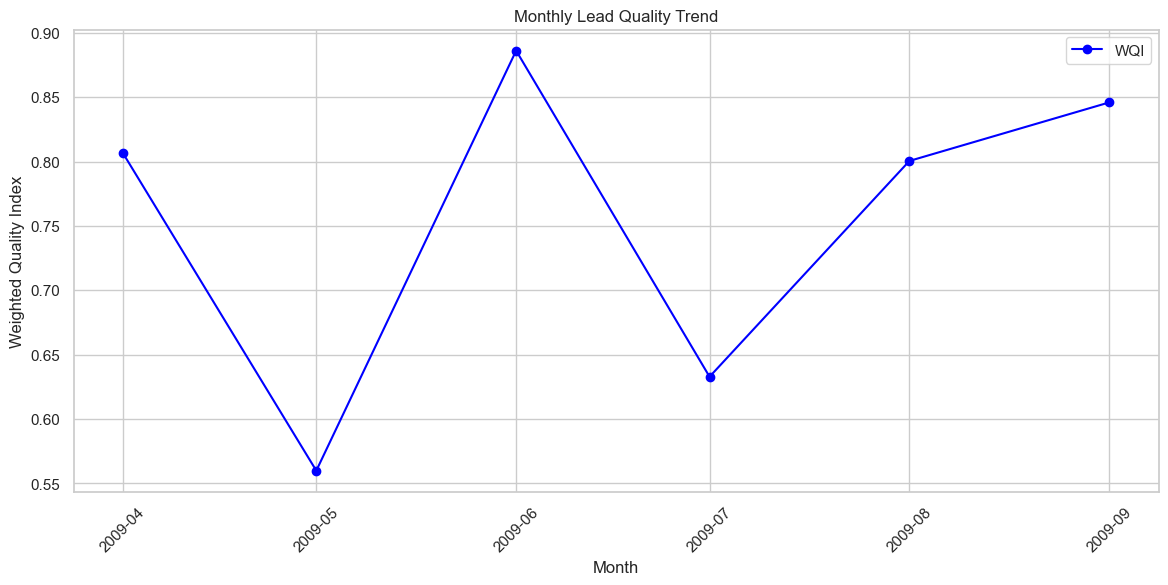

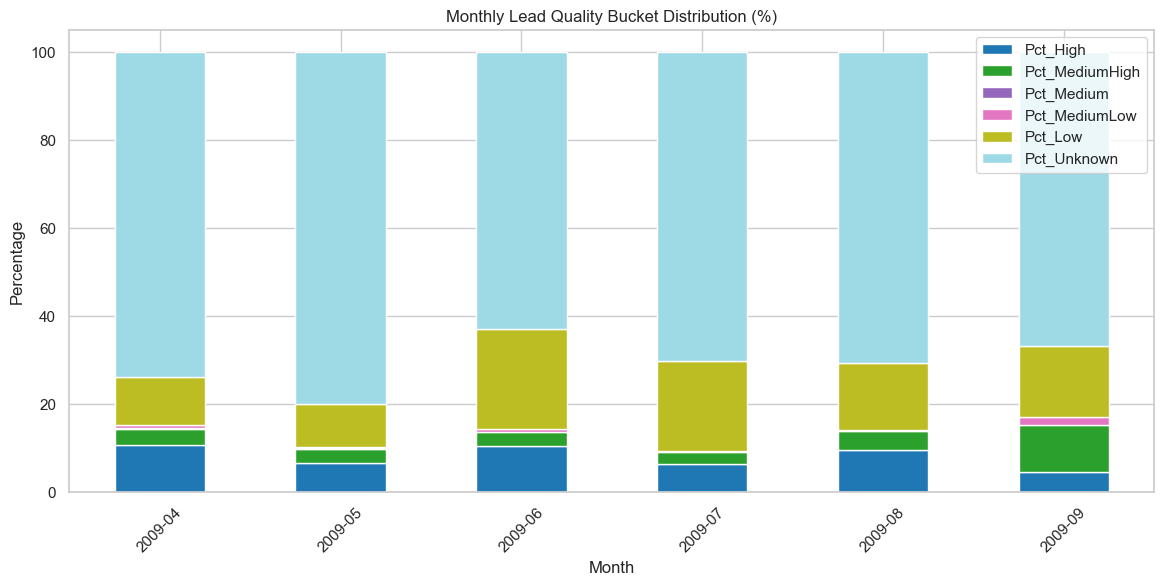

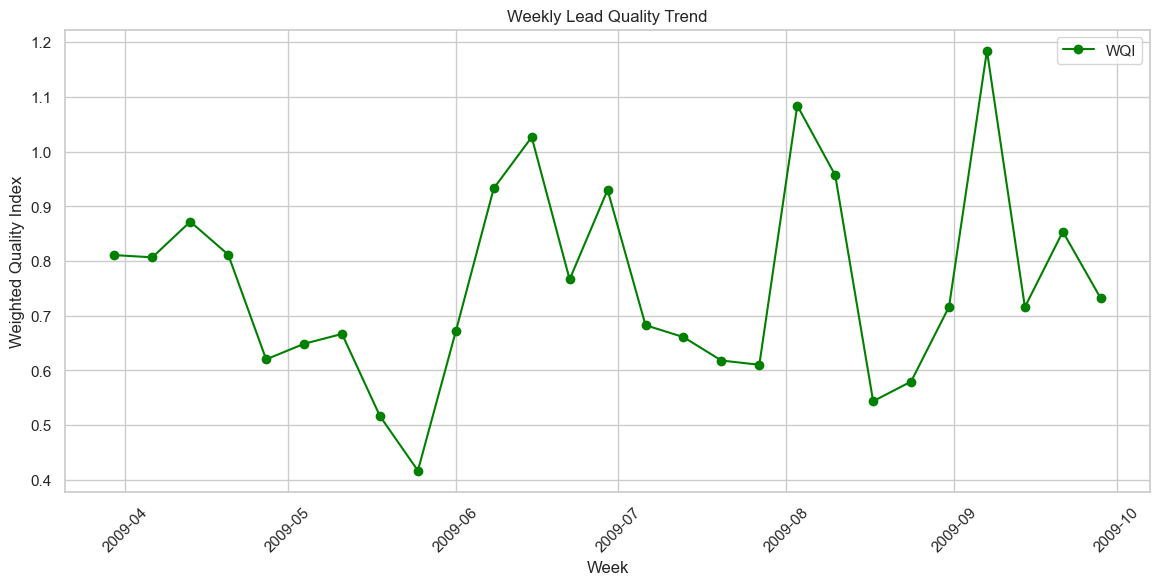

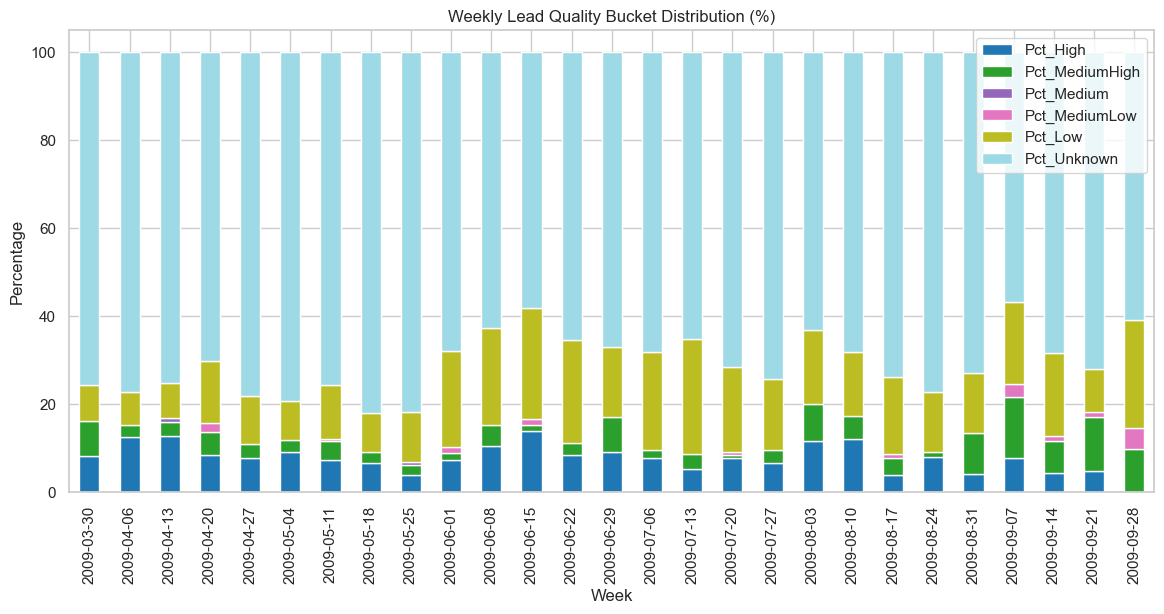

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# ---- Monthly Trend ----
plt.figure(figsize=(14,6))
# Line: Weighted Quality Index
plt.plot(monthly_trend['Period'], monthly_trend['Weighted_Quality_Index'], marker='o', color='blue', label='WQI')
plt.title('Monthly Lead Quality Trend')
plt.xlabel('Month')
plt.ylabel('Weighted Quality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Stacked Bar: Lead Bucket % per month
bucket_cols = ['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low','Pct_Unknown']
monthly_trend[bucket_cols].plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.xticks(range(len(monthly_trend['Period'])), monthly_trend['Period'].dt.strftime('%Y-%m'), rotation=45)
plt.title('Monthly Lead Quality Bucket Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.show()

# ---- Weekly Trend ----
plt.figure(figsize=(14,6))
plt.plot(weekly_trend['Period'], weekly_trend['Weighted_Quality_Index'], marker='o', color='green', label='WQI')
plt.title('Weekly Lead Quality Trend')
plt.xlabel('Week')
plt.ylabel('Weighted Quality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

weekly_trend[bucket_cols].plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.xticks(range(len(weekly_trend['Period'])), weekly_trend['Period'].dt.strftime('%Y-%m-%d'), rotation=90)
plt.title('Weekly Lead Quality Bucket Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Week')
plt.show()


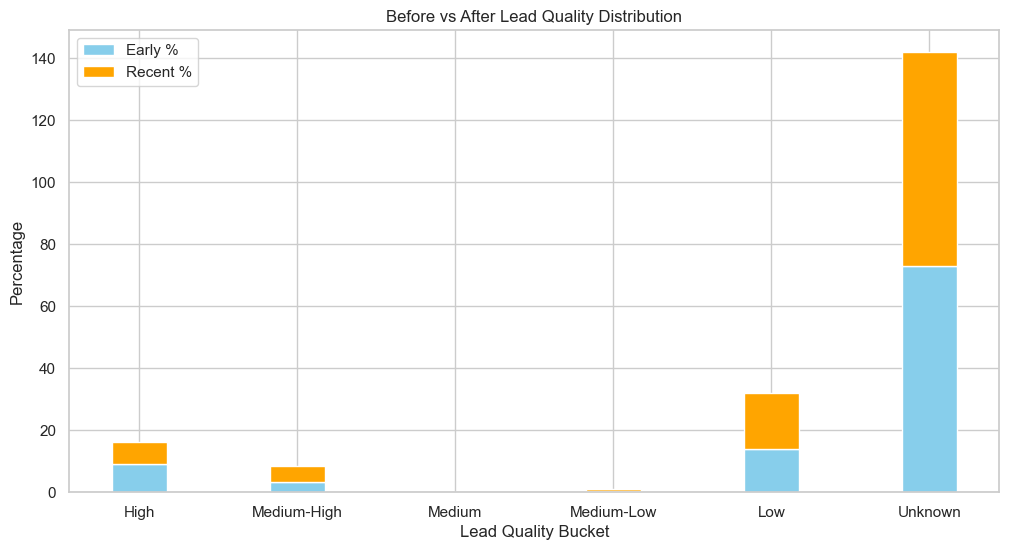

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1333937881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_table, x='LeadQualityBucket', y='Change_pct_points', palette='coolwarm')


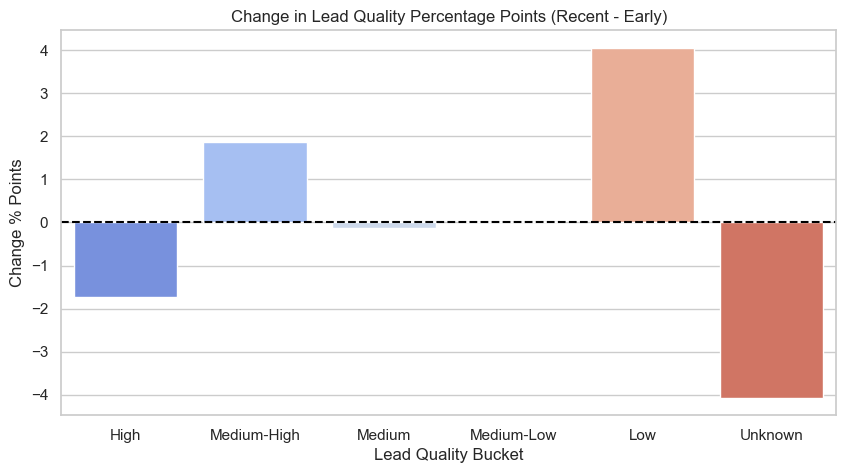

In [50]:
plt.figure(figsize=(12,6))
x = comparison_table['LeadQualityBucket']
width = 0.35

plt.bar(x, comparison_table['Early_pct'], width=width, label='Early %', color='skyblue')
plt.bar(x, comparison_table['Recent_pct'], width=width, bottom=comparison_table['Early_pct'], label='Recent %', color='orange')
plt.title('Before vs After Lead Quality Distribution')
plt.ylabel('Percentage')
plt.xlabel('Lead Quality Bucket')
plt.legend()
plt.show()

# Optional: Change in points
plt.figure(figsize=(10,5))
sns.barplot(data=comparison_table, x='LeadQualityBucket', y='Change_pct_points', palette='coolwarm')
plt.title('Change in Lead Quality Percentage Points (Recent - Early)')
plt.ylabel('Change % Points')
plt.xlabel('Lead Quality Bucket')
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [51]:
#Preparing tables without Unknowns- 
# Monthly trend
monthly_trend_filtered = monthly_trend.copy()
monthly_trend_filtered = monthly_trend_filtered.drop(columns=['Pct_Unknown'])

# Calculating TotalKnownLeads for normalizing percentages
monthly_trend_filtered['TotalKnownLeads'] = monthly_trend_filtered[['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']].sum(axis=1)
for col in ['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']:
    monthly_trend_filtered[col] = (monthly_trend_filtered[col] / monthly_trend_filtered['TotalKnownLeads']) * 100

# Recalculating WQI
lead_quality_weight = [5,4,3,2,1]  # High to Low
monthly_trend_filtered['Weighted_Quality_Index'] = monthly_trend_filtered[['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']].div(100).dot(lead_quality_weight)

# Weekly trend
weekly_trend_filtered = weekly_trend.copy()
weekly_trend_filtered = weekly_trend_filtered.drop(columns=['Pct_Unknown'])
weekly_trend_filtered['TotalKnownLeads'] = weekly_trend_filtered[['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']].sum(axis=1)
for col in ['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']:
    weekly_trend_filtered[col] = (weekly_trend_filtered[col] / weekly_trend_filtered['TotalKnownLeads']) * 100
weekly_trend_filtered['Weighted_Quality_Index'] = weekly_trend_filtered[['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']].div(100).dot(lead_quality_weight)

# Before vs After comparison
comparison_table_filtered = comparison_table[comparison_table['LeadQualityBucket'] != 'Unknown'].copy()
comparison_table_filtered['Change_pct_points'] = comparison_table_filtered['Recent_pct'] - comparison_table_filtered['Early_pct']


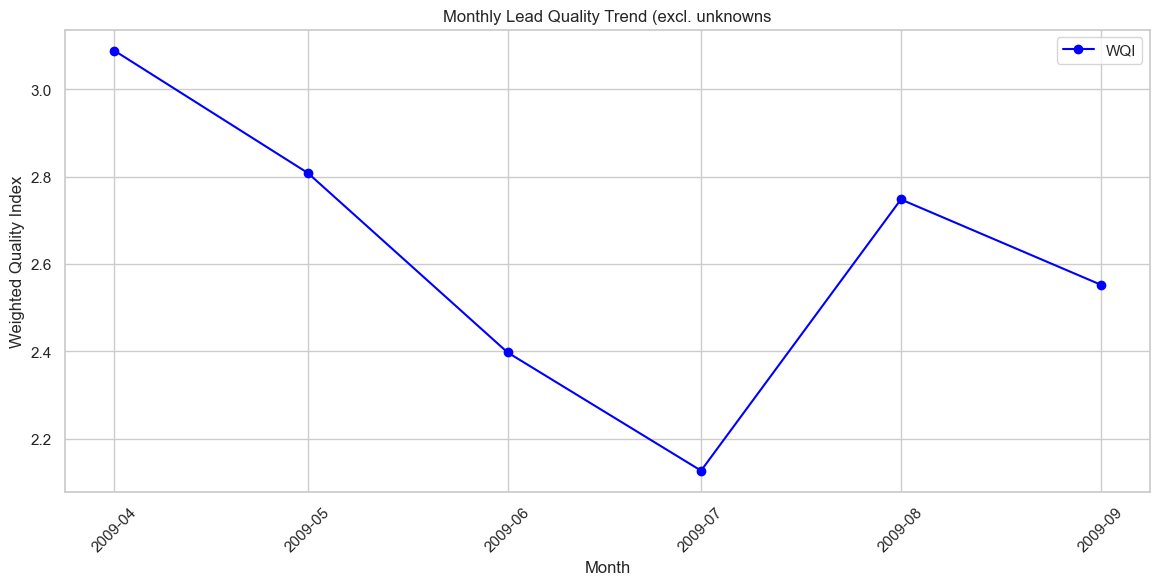

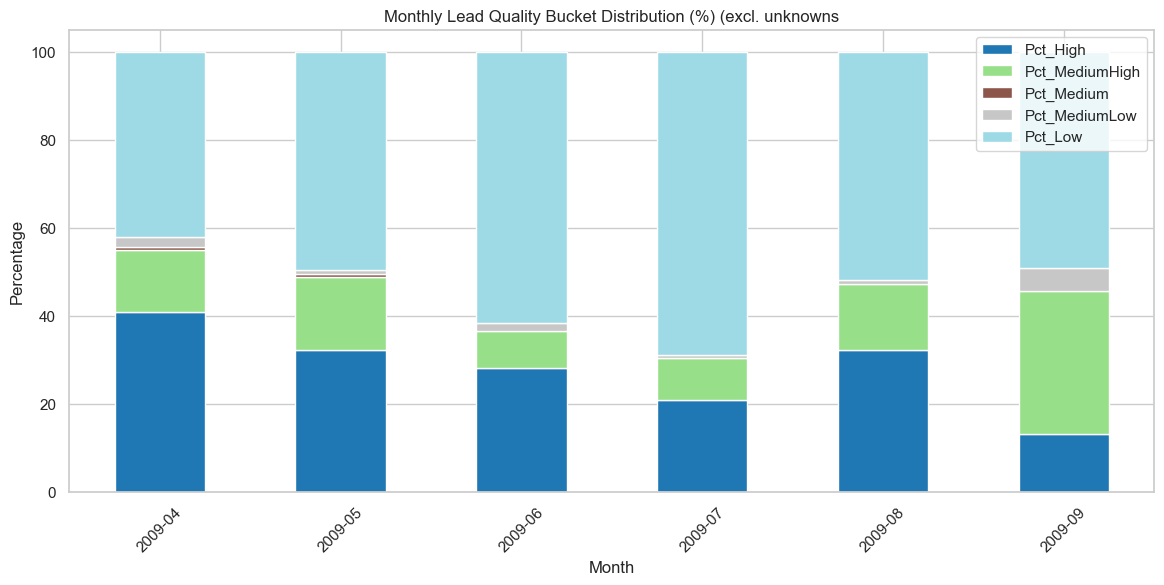

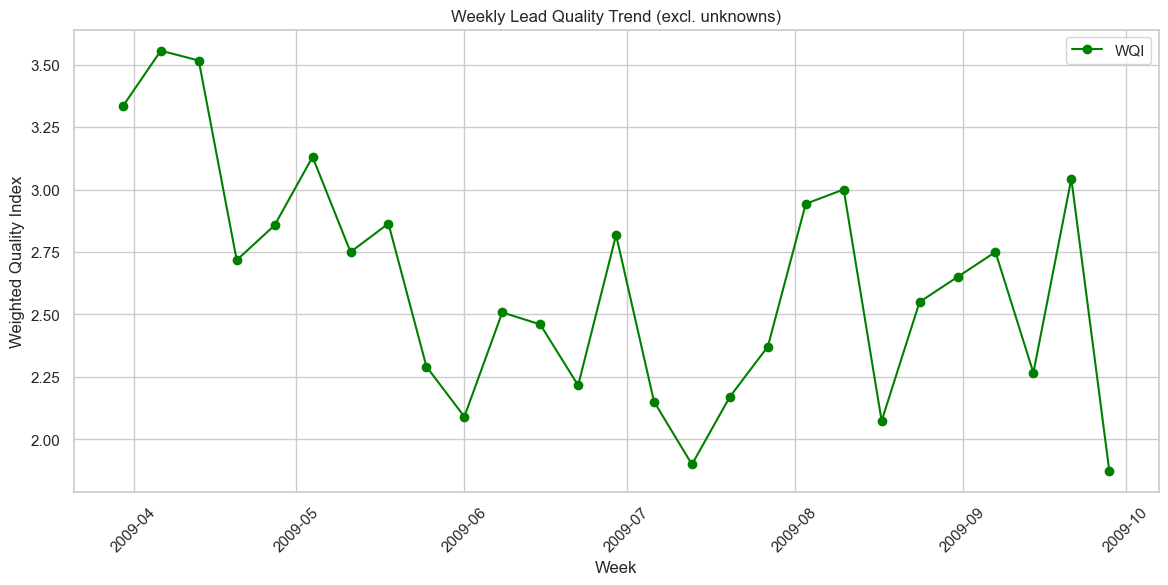

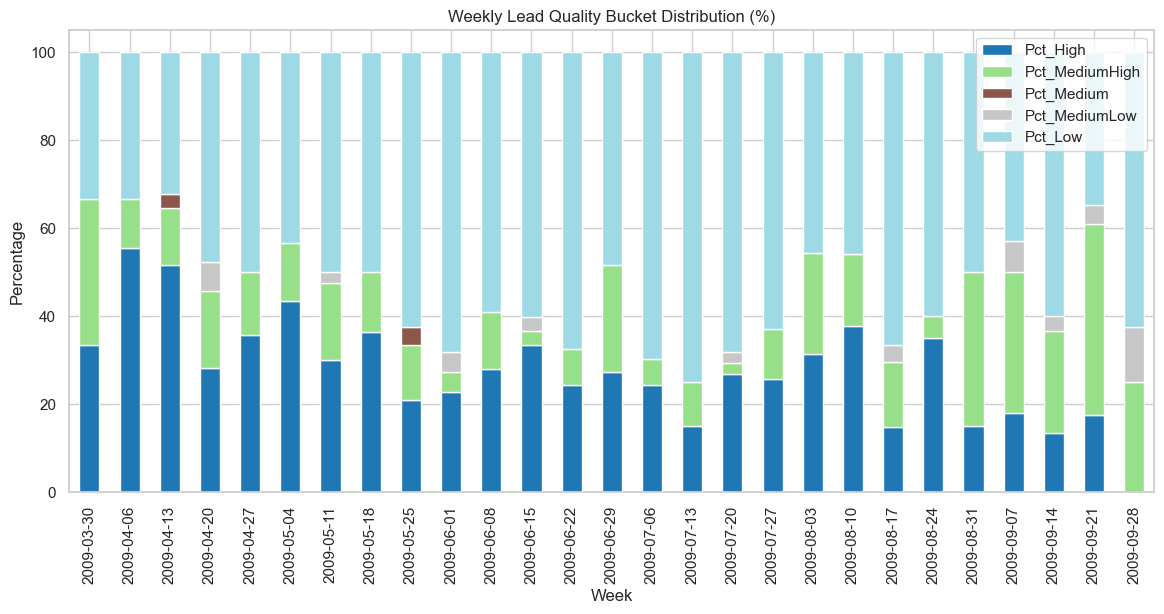

In [52]:
# Set seaborn style
sns.set(style="whitegrid")

# ---- Monthly Trend ----
plt.figure(figsize=(14,6))
# Line: Weighted Quality Index
plt.plot(monthly_trend_filtered['Period'], monthly_trend_filtered['Weighted_Quality_Index'], marker='o', color='blue', label='WQI')
plt.title('Monthly Lead Quality Trend (excl. unknowns')
plt.xlabel('Month')
plt.ylabel('Weighted Quality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Stacked Bar: Lead Bucket % per month
bucket_cols = ['Pct_High','Pct_MediumHigh','Pct_Medium','Pct_MediumLow','Pct_Low']
monthly_trend_filtered[bucket_cols].plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.xticks(range(len(monthly_trend_filtered['Period'])), monthly_trend_filtered['Period'].dt.strftime('%Y-%m'), rotation=45)
plt.title('Monthly Lead Quality Bucket Distribution (%) (excl. unknowns')
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.show()

# ---- Weekly Trend ----
plt.figure(figsize=(14,6))
plt.plot(weekly_trend_filtered['Period'], weekly_trend_filtered['Weighted_Quality_Index'], marker='o', color='green', label='WQI')
plt.title('Weekly Lead Quality Trend (excl. unknowns)')
plt.xlabel('Week')
plt.ylabel('Weighted Quality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

weekly_trend_filtered[bucket_cols].plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.xticks(range(len(weekly_trend_filtered['Period'])), weekly_trend_filtered['Period'].dt.strftime('%Y-%m-%d'), rotation=90)
plt.title('Weekly Lead Quality Bucket Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Week')
plt.show()

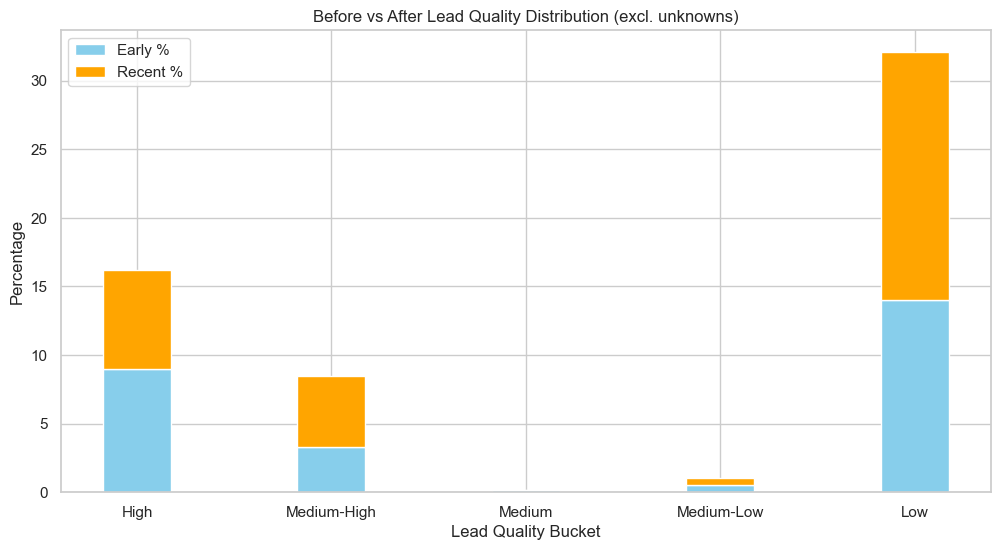

C:\Users\Admin\AppData\Local\Temp\ipykernel_6380\1028392218.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_table_filtered, x='LeadQualityBucket', y='Change_pct_points', palette='coolwarm')


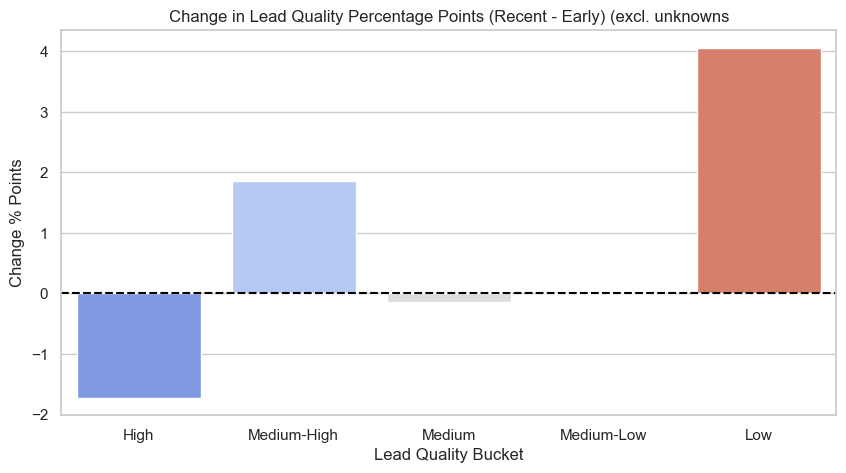

In [62]:
plt.figure(figsize=(12,6))
x = comparison_table_filtered['LeadQualityBucket']
width = 0.35

plt.bar(x, comparison_table_filtered['Early_pct'], width=width, label='Early %', color='skyblue')
plt.bar(x, comparison_table_filtered['Recent_pct'], width=width, bottom=comparison_table_filtered['Early_pct'], label='Recent %', color='orange')
plt.title('Before vs After Lead Quality Distribution (excl. unknowns)')
plt.ylabel('Percentage')
plt.xlabel('Lead Quality Bucket')
plt.legend()
plt.show()

#Change in points
plt.figure(figsize=(10,5))
sns.barplot(data=comparison_table_filtered, x='LeadQualityBucket', y='Change_pct_points', palette='coolwarm')
plt.title('Change in Lead Quality Percentage Points (Recent - Early) (excl. unknowns')
plt.ylabel('Change % Points')
plt.xlabel('Lead Quality Bucket')
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [53]:
#Calculating Statistical Significance
from scipy.stats import chi2_contingency

# Prepare the contingency table
contingency_table = comparison_table_filtered[['Early_count', 'Recent_count']].set_index(comparison_table_filtered['LeadQualityBucket'])
print(contingency_table)

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)

if p_value < 0.05:
    print("The change in lead quality over time is statistically significant.")
else:
    print("The change in lead quality over time is NOT statistically significant.")


                   Early_count  Recent_count
LeadQualityBucket                           
High                       135           109
Medium-High                 50            78
Medium                       2             0
Medium-Low                   8             8
Low                        211           272
Chi-square statistic: 14.407454293101276
Degrees of freedom: 4
P-value: 0.006102000776216427
The change in lead quality over time is statistically significant.


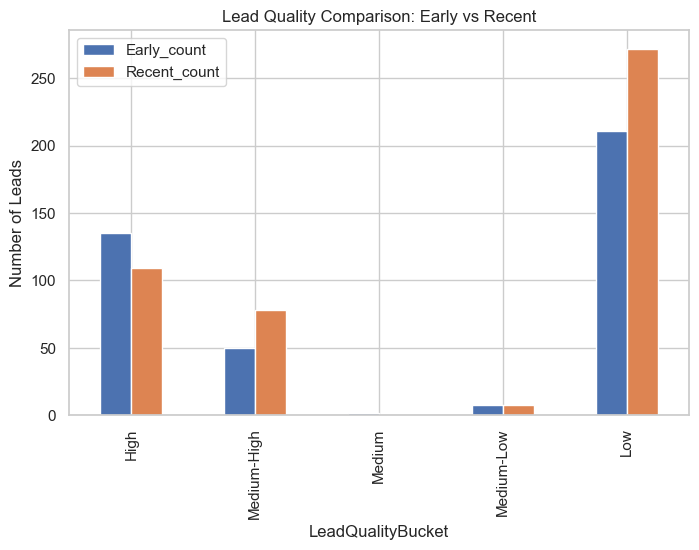

In [54]:
comparison_table_filtered.plot(
    x='LeadQualityBucket', 
    y=['Early_count', 'Recent_count'], 
    kind='bar', 
    figsize=(8,5),
    title='Lead Quality Comparison: Early vs Recent'
)
plt.ylabel('Number of Leads')
plt.show()


#Question2 - Drivers of Lead Quality 

In [57]:
dataset_clean.columns

Index(['LeadCreated', 'FirstName', 'Email', 'VendorLeadID', 'CallStatus',
       'WidgetName', 'PublisherZoneName', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'Partner', 'ReferralDomain', 'MarketingCampaign',
       'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters', 'VendorLeadID_Anomaly', 'UserKey',
       'RepeatedUser', 'LeadQualityBucket', 'LeadQualityScore',
       'GoodQualityLead', 'WidgetSize', 'Widget_Fieldset', 'Widget_FormType',
       'Widget_Design', 'Widget_BGColor', 'LeadSourceType', 'BrandingType',
       'AddressScore_Category', 'PhoneScore_Category', 'TrafficType',
       'ReferralURL_Clean'],
      dtype='object')

Category1 - Ad Placement & Design Factors

In [58]:
#Defining Helper Function
def build_driver_table(df, group_col):
    """
    Builds a summary table for a given driver (group_col) showing
    total leads, quality metrics, and % breakdowns.
    """
    # Exclude unknowns
    df = df[df['LeadQualityBucket'] != 'Unknown'].copy()
    
    # Group by the chosen dimension
    grouped = df.groupby(group_col).agg(
        TotalLeads=('LeadQualityScore', 'count'),
        AvgLeadQualityScore=('LeadQualityScore', 'mean'),
        Weighted_Quality_Index=('LeadQualityScore', 'mean')  # same here but consistent
    ).reset_index()
    
    # Calculate % of each quality bucket within each group
    bucket_counts = (
        df.groupby([group_col, 'LeadQualityBucket'])
        .size()
        .unstack(fill_value=0)
        .apply(lambda x: 100 * x / x.sum(), axis=1)
        .reset_index()
    )

    # Merge counts with bucket % data
    merged = pd.merge(grouped, bucket_counts, on=group_col, how='left')
    
    # Derive consolidated %High, %MediumHigh, etc. (if buckets exist)
    for col in ['High', 'MediumHigh', 'Medium', 'MediumLow', 'Low']:
        if col not in merged.columns:
            merged[col] = 0.0
    
    merged['Pct_High'] = merged['High']
    merged['Pct_MediumHigh'] = merged['MediumHigh']
    merged['Pct_Medium'] = merged['Medium']
    merged['Pct_MediumLow'] = merged['MediumLow']
    merged['Pct_Low'] = merged['Low']
    
    # Compute combined “High Quality” and “Low Quality” percentages
    merged['Pct_HighQuality'] = merged['Pct_High'] + merged['Pct_MediumHigh']
    merged['Pct_LowQuality'] = merged['Pct_Low'] + merged['Pct_MediumLow']
    
    # Sort descending by WQI
    merged = merged.sort_values(by='Weighted_Quality_Index', ascending=False)
    
    return merged


#Generating tables
driver_tables = {}

for col in ['PublisherZoneName', 'Widget_FormType', 'Widget_Design', 'Widget_BGColor']:
    try:
        table = build_driver_table(dataset_clean, col)
        driver_tables[col] = table
        print(f"\nCreated driver table for {col}")
        display(table.head())
    except Exception as e:
        print(f"Skipped {col} due to: {e}") 



Created driver table for PublisherZoneName


,PublisherZoneName,TotalLeads,AvgLeadQualityScore,Weighted_Quality_Index,High,Low,Medium,Medium-High,Medium-Low,MediumHigh,MediumLow,Pct_High,Pct_MediumHigh,Pct_Medium,Pct_MediumLow,Pct_Low,Pct_HighQuality,Pct_LowQuality
0,topleft_302x252,763,2.604194,2.604194,28.571429,54.652687,0.262123,14.547837,1.965924,0.0,0.0,28.571429,0.0,0.262123,0.0,54.652687,28.571429,54.652687
1,topright_300x250,110,2.418182,2.418182,23.636364,60.000000,0.000000,15.454545,0.909091,0.0,0.0,23.636364,0.0,0.000000,0.0,60.000000,23.636364,60.000000



Created driver table for Widget_FormType


,Widget_FormType,TotalLeads,AvgLeadQualityScore,Weighted_Quality_Index,High,Low,Medium,Medium-High,Medium-Low,MediumHigh,MediumLow,Pct_High,Pct_MediumHigh,Pct_Medium,Pct_MediumLow,Pct_Low,Pct_HighQuality,Pct_LowQuality
1,2DC,41,2.756098,2.756098,29.268293,51.219512,0.000000,19.512195,0.000000,0.0,0.0,29.268293,0.0,0.000000,0.0,51.219512,29.268293,51.219512
0,1DC,832,2.572115,2.572115,27.884615,55.528846,0.240385,14.423077,1.923077,0.0,0.0,27.884615,0.0,0.240385,0.0,55.528846,27.884615,55.528846



Created driver table for Widget_Design


,Widget_Design,TotalLeads,AvgLeadQualityScore,Weighted_Quality_Index,High,Low,Medium,Medium-High,Medium-Low,MediumHigh,MediumLow,Pct_High,Pct_MediumHigh,Pct_Medium,Pct_MediumLow,Pct_Low,Pct_HighQuality,Pct_LowQuality
0,BlueMeter,39,3.487179,3.487179,48.717949,33.333333,0.000000,17.948718,0.000000,0.0,0.0,48.717949,0.0,0.000000,0.0,33.333333,48.717949,33.333333
2,Head2,22,3.409091,3.409091,50.000000,36.363636,0.000000,13.636364,0.000000,0.0,0.0,50.000000,0.0,0.000000,0.0,36.363636,50.000000,36.363636
1,CreditSolutions,344,2.581395,2.581395,27.034884,54.941860,0.581395,15.697674,1.744186,0.0,0.0,27.034884,0.0,0.581395,0.0,54.941860,27.034884,54.941860
4,Unknown,205,2.546341,2.546341,27.804878,57.073171,0.000000,14.146341,0.975610,0.0,0.0,27.804878,0.0,0.000000,0.0,57.073171,27.804878,57.073171
5,white,112,2.446429,2.446429,28.571429,60.714286,0.000000,9.821429,0.892857,0.0,0.0,28.571429,0.0,0.000000,0.0,60.714286,28.571429,60.714286



Created driver table for Widget_BGColor


,Widget_BGColor,TotalLeads,AvgLeadQualityScore,Weighted_Quality_Index,High,Low,Medium,Medium-High,Medium-Low,MediumHigh,MediumLow,Pct_High,Pct_MediumHigh,Pct_Medium,Pct_MediumLow,Pct_Low,Pct_HighQuality,Pct_LowQuality
0,Unknown,755,2.622517,2.622517,29.006623,54.437086,0.264901,14.701987,1.589404,0.0,0.0,29.006623,0.0,0.264901,0.0,54.437086,29.006623,54.437086
1,blue,78,2.333333,2.333333,19.230769,60.256410,0.000000,17.948718,2.564103,0.0,0.0,19.230769,0.0,0.000000,0.0,60.256410,19.230769,60.256410
2,dark,40,2.275000,2.275000,25.000000,62.500000,0.000000,7.500000,5.000000,0.0,0.0,25.000000,0.0,0.000000,0.0,62.500000,25.000000,62.500000


In [59]:
#Extending analysis to size of widget
size_summary = (
    dataset_clean[dataset_clean['LeadQualityBucket'] != 'Unknown']
    .groupby('WidgetSize')
    .agg(
        TotalLeads=('VendorLeadID', 'count'),
        AvgLeadQualityScore=('LeadQualityScore', 'mean'),
        Weighted_Quality_Index=('LeadQualityScore', 'mean')
    )
    .reset_index()
)

print(size_summary)


  WidgetSize  TotalLeads  AvgLeadQualityScore  Weighted_Quality_Index
0    300X250         252             2.825397                2.825397
1    302X252         621             2.481481                2.481481


In [62]:
import os

# Create folder for chart exports
os.makedirs("charts/category_1", exist_ok=True)

# PublisherZoneName driver table
publisherzone_df = pd.DataFrame({
    'PublisherZoneName': ['topleft_302x252', 'topright_300x250'],
    'TotalLeads': [763, 110],
    'AvgLeadQualityScore': [2.604194, 2.418182],
    'Weighted_Quality_Index': [2.604194, 2.418182],
    'Pct_HighQuality': [28.57, 23.63],
    'Pct_LowQuality': [54.65, 60.00]
})

# Widget Form Type
widgetformtype_df = pd.DataFrame({
    'Widget_FormType': ['2DC', '1DC'],
    'TotalLeads': [41, 832],
    'AvgLeadQualityScore': [2.756098, 2.572115],
    'Pct_HighQuality': [29.27, 27.88],
    'Pct_LowQuality': [51.22, 55.53]
})

# Widget Design
widgetdesign_df = pd.DataFrame({
    'Widget_Design': ['BlueMeter', 'Head2', 'CreditSolutions', 'Unknown', 'white'],
    'TotalLeads': [39, 22, 344, 205, 112],
    'AvgLeadQualityScore': [3.487179, 3.409091, 2.581395, 2.546341, 2.446429],
    'Pct_HighQuality': [48.72, 50.00, 27.03, 27.80, 28.57],
    'Pct_LowQuality': [33.33, 36.36, 54.94, 57.07, 60.71]
})

# Widget BGColor
widgetbgcolor_df = pd.DataFrame({
    'Widget_BGColor': ['Unknown', 'blue', 'dark'],
    'TotalLeads': [755, 78, 40],
    'AvgLeadQualityScore': [2.622517, 2.333333, 2.275],
    'Pct_HighQuality': [29.01, 19.23, 25.00],
    'Pct_LowQuality': [54.44, 60.26, 62.50]
})

# Widget Size 
widgetsize_df = pd.DataFrame({
    'Widget_Size': ['302x252', '300x250'],
    'AvgLeadQualityScore': [2.481481, 2.825397],
    'TotalLeads': [621, 252]
})


C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1510786567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


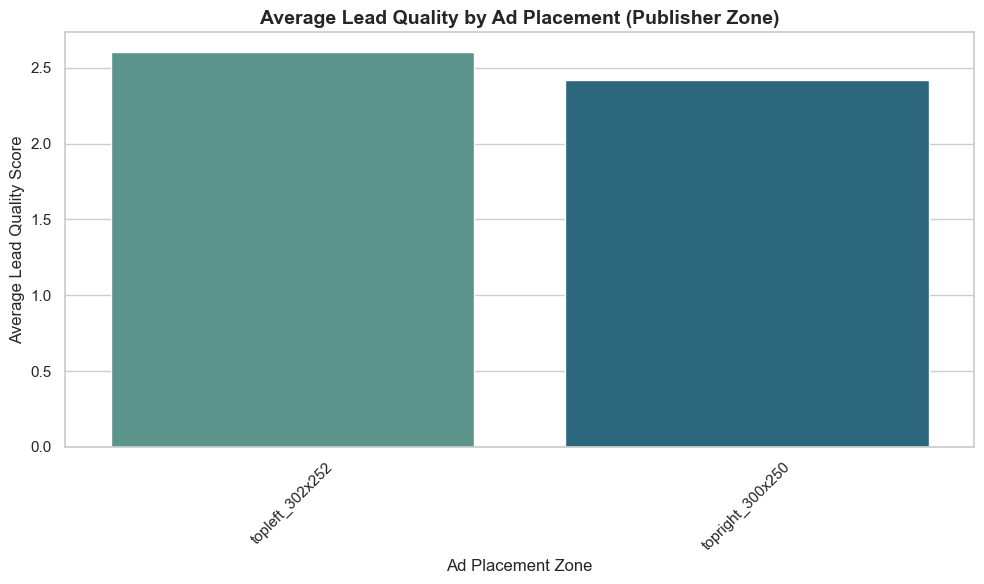

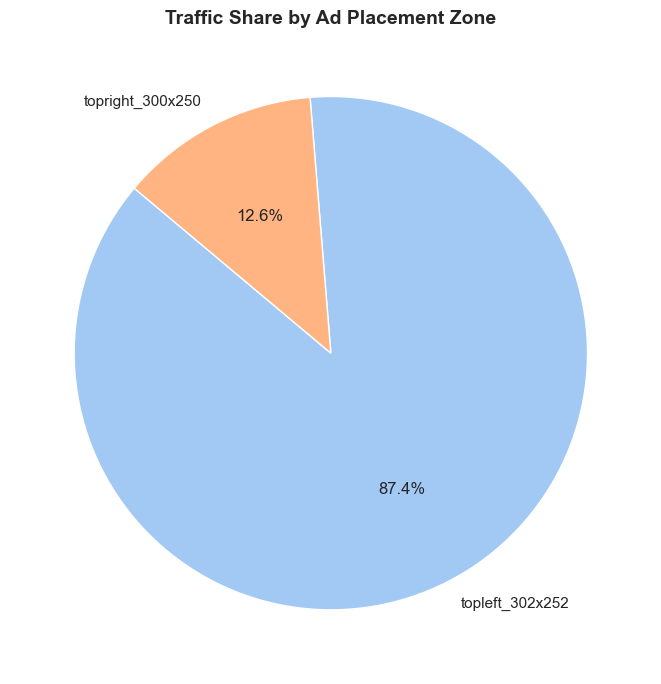

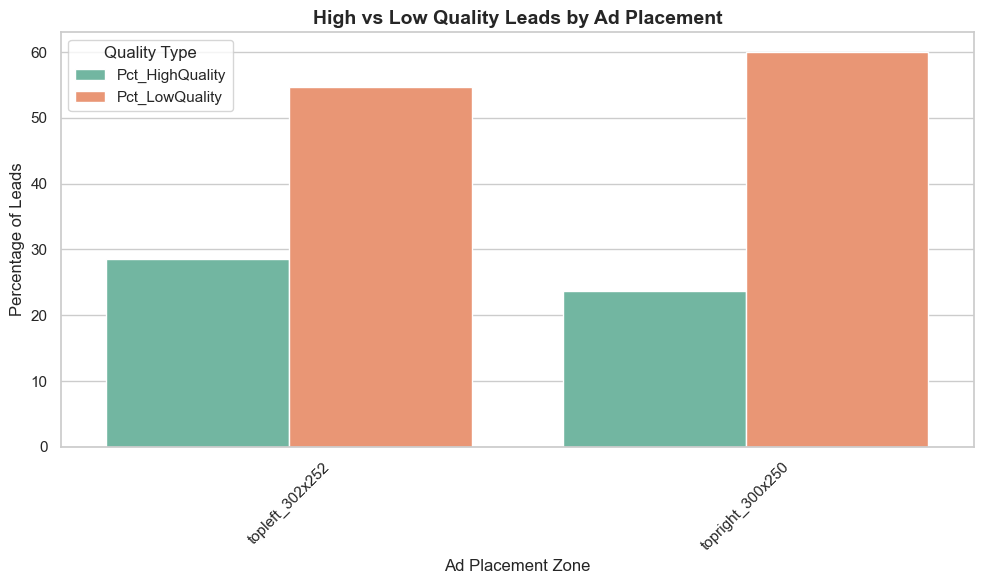

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1510786567.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


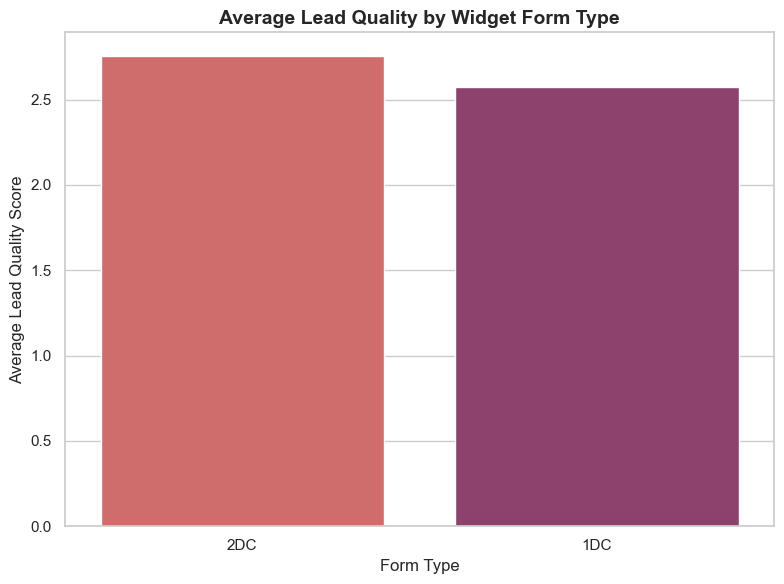

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1510786567.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


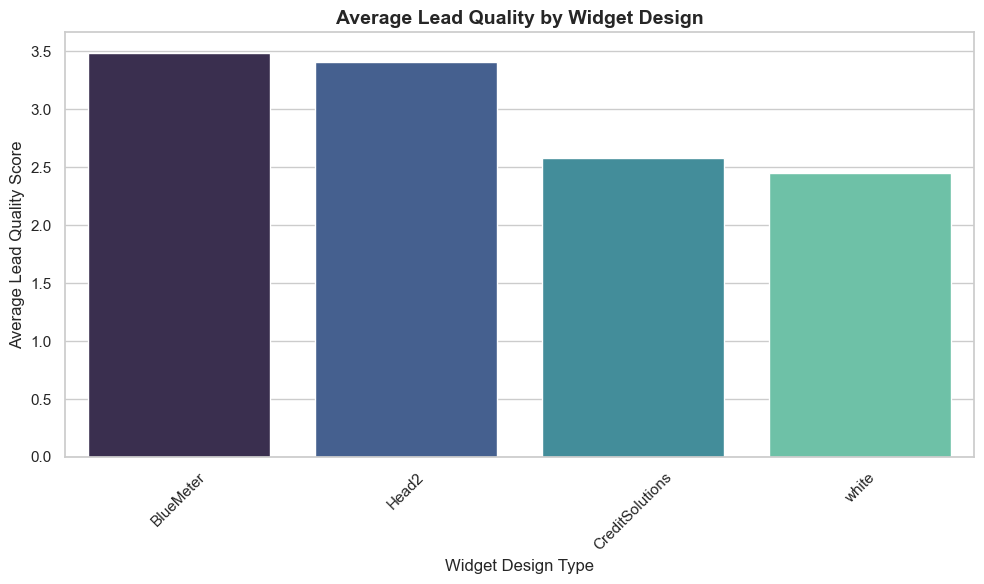

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1510786567.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


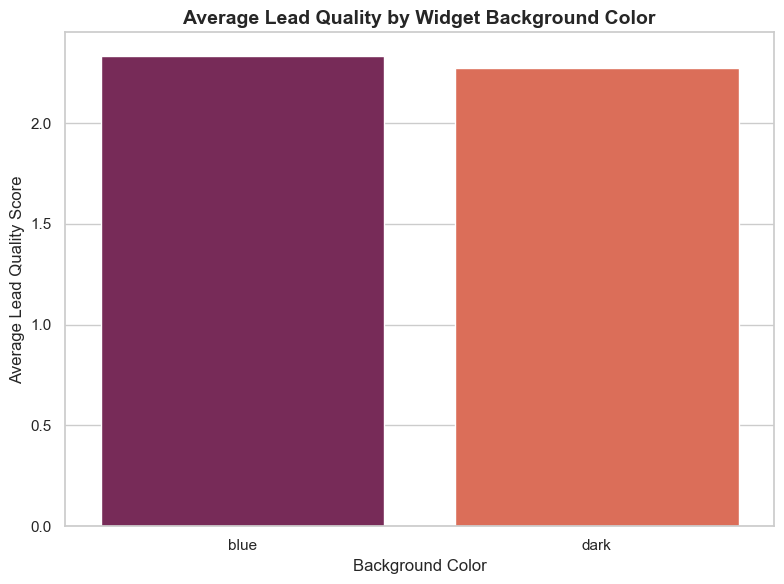

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1510786567.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


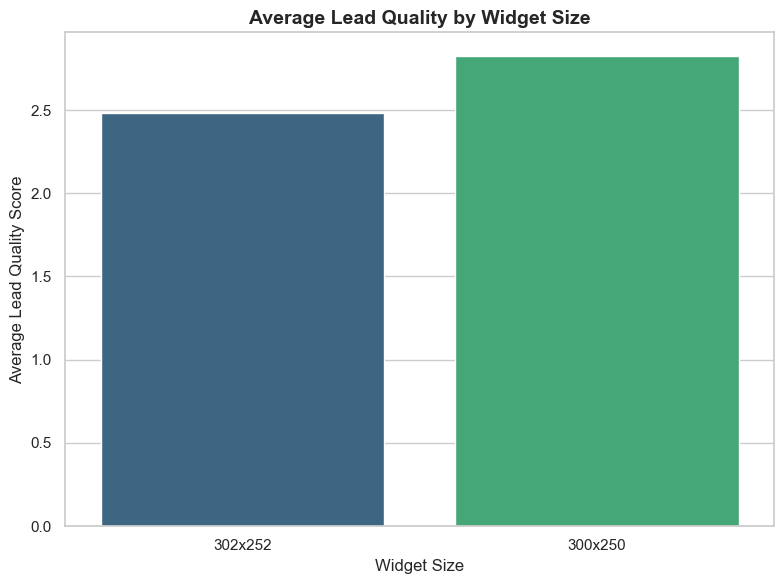

In [70]:
#CHART 1 — Bar Chart: Average Lead Quality by Ad Placement (PublisherZoneName)
plt.figure(figsize=(10,6))
sns.barplot(
    data=publisherzone_df,
    x='PublisherZoneName',
    y='AvgLeadQualityScore',
    palette='crest'
)
plt.title("Average Lead Quality by Ad Placement (Publisher Zone)", fontsize=14, weight='bold')
plt.xlabel("Ad Placement Zone")
plt.ylabel("Average Lead Quality Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/category_1/1_avg_lead_quality_by_zone.png", dpi=300)
plt.show() 

#Pie Chart- Traffic Share by Ad placement 
plt.figure(figsize=(7,7))
plt.pie(
    publisherzone_df['TotalLeads'],
    labels=publisherzone_df['PublisherZoneName'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title("Traffic Share by Ad Placement Zone", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("charts/category_1/2_traffic_share_by_zone.png", dpi=300)
plt.show()

#Bar Chart - High vs Low % Quality by Ad Placement
melted_zone = publisherzone_df.melt(
    id_vars='PublisherZoneName',
    value_vars=['Pct_HighQuality','Pct_LowQuality'],
    var_name='QualityType',
    value_name='Percentage'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=melted_zone,
    x='PublisherZoneName',
    y='Percentage',
    hue='QualityType',
    palette='Set2'
)
plt.title("High vs Low Quality Leads by Ad Placement", fontsize=14, weight='bold')
plt.xlabel("Ad Placement Zone")
plt.ylabel("Percentage of Leads")
plt.xticks(rotation=45)
plt.legend(title="Quality Type")
plt.tight_layout()
plt.savefig("charts/category_1/3_quality_distribution_by_zone.png", dpi=300)
plt.show() 

#Bar Chart - Average Lead Quality by Widget Form Type
plt.figure(figsize=(8,6))
sns.barplot(
    data=widgetformtype_df,
    x='Widget_FormType',
    y='AvgLeadQualityScore',
    palette='flare'
)
plt.title("Average Lead Quality by Widget Form Type", fontsize=14, weight='bold')
plt.xlabel("Form Type")
plt.ylabel("Average Lead Quality Score")
plt.tight_layout()
plt.savefig("charts/category_1/4_avg_lead_quality_by_form.png", dpi=300)
plt.show()

#Bar Chart - Average Lead Quality by Widget Design
plt.figure(figsize=(10,6))
sns.barplot(
    data=widgetdesign_df[widgetdesign_df['Widget_Design'] != 'Unknown'],
    x='Widget_Design',
    y='AvgLeadQualityScore',
    palette='mako'
)
plt.title("Average Lead Quality by Widget Design", fontsize=14, weight='bold')
plt.xlabel("Widget Design Type")
plt.ylabel("Average Lead Quality Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/category_1/5_avg_lead_quality_by_design.png", dpi=300)
plt.show()

#Bar Chart - Average Lead Quality by Widget Background Color
plt.figure(figsize=(8,6))
sns.barplot(
    data=widgetbgcolor_df[widgetbgcolor_df['Widget_BGColor'] != 'Unknown'],
    x='Widget_BGColor',
    y='AvgLeadQualityScore',
    palette='rocket'
)
plt.title("Average Lead Quality by Widget Background Color", fontsize=14, weight='bold')
plt.xlabel("Background Color")
plt.ylabel("Average Lead Quality Score")
plt.tight_layout()
plt.savefig("charts/category_1/6_avg_lead_quality_by_bgcolor.png", dpi=300)
plt.show()

#Average Lead Quality by Widget Size 
plt.figure(figsize=(8,6))
sns.barplot(
    data=widgetsize_df,
    x='Widget_Size',
    y='AvgLeadQualityScore',
    palette='viridis'
)
plt.title("Average Lead Quality by Widget Size", fontsize=14, weight='bold')
plt.xlabel("Widget Size")
plt.ylabel("Average Lead Quality Score")
plt.tight_layout()
plt.savefig("charts/category_1/7_avg_lead_quality_by_size.png", dpi=300)
plt.show()

Aggregated 2 driver-level combinations for heatmap generation.


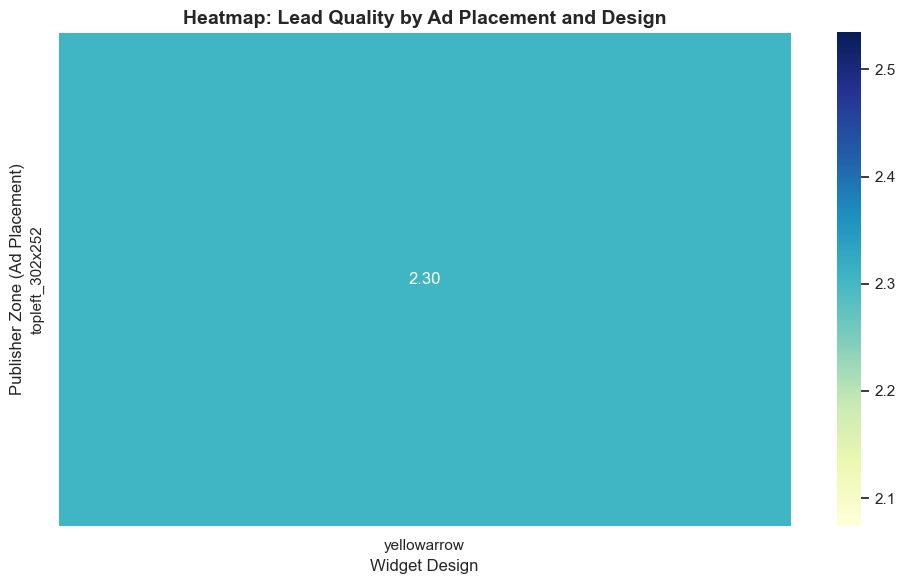

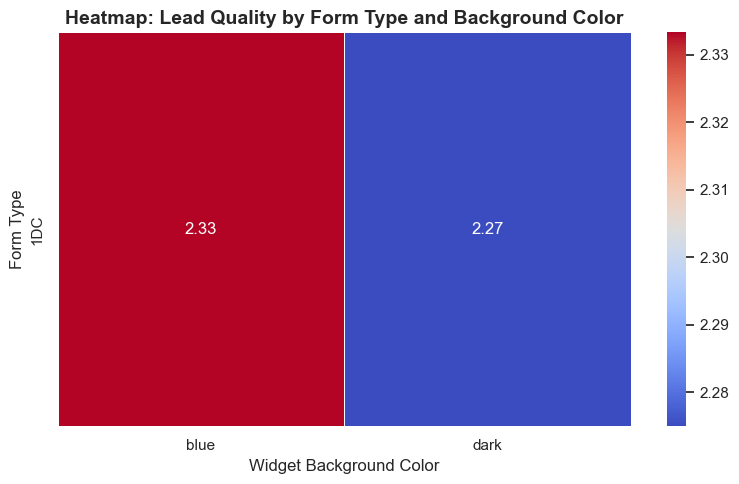

In [73]:
# Create export folder
os.makedirs("charts/category_1", exist_ok=True)

def build_driver_heatmaps(df):
    """
    Builds and exports heatmaps for lead quality drivers (placement, design, form type, background color)
    """
    # ------------------------------------------------------------
    # Filter out unknowns and anomalies
    # ------------------------------------------------------------
    clean_df = df[
        (df['LeadQualityBucket'] != 'Unknown') &
        (~df['Widget_Design'].isin(['Unknown'])) &
        (~df['Widget_BGColor'].isin(['Unknown']))
    ].copy()

    # ------------------------------------------------------------
    # Aggregate to compute AvgLeadQuality & TotalLeads
    # ------------------------------------------------------------
    agg_df = (
        clean_df.groupby(['PublisherZoneName', 'Widget_Design', 'Widget_FormType', 'Widget_BGColor'])
        .agg({'LeadQualityScore': 'mean', 'VendorLeadID': 'count'})
        .rename(columns={'LeadQualityScore': 'AvgLeadQuality', 'VendorLeadID': 'TotalLeads'})
        .reset_index()
    )

    print(f"Aggregated {len(agg_df)} driver-level combinations for heatmap generation.")

    # ------------------------------------------------------------
    # Heatmap 1 — Zone vs Design
    # ------------------------------------------------------------
    heatmap_pivot1 = agg_df.pivot_table(
        index='PublisherZoneName',
        columns='Widget_Design',
        values='AvgLeadQuality'
    )

    plt.figure(figsize=(10,6))
    sns.heatmap(heatmap_pivot1, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
    plt.title("Heatmap: Lead Quality by Ad Placement and Design", fontsize=14, weight='bold')
    plt.xlabel("Widget Design")
    plt.ylabel("Publisher Zone (Ad Placement)")
    plt.tight_layout()
    plt.savefig("charts/category_1/1_heatmap_zone_vs_design.png", dpi=300)
    plt.show()

    # ------------------------------------------------------------
    # Heatmap 2 — Form Type vs Background Color
    # ------------------------------------------------------------
    heatmap_pivot2 = agg_df.pivot_table(
        index='Widget_FormType',
        columns='Widget_BGColor',
        values='AvgLeadQuality'
    )

    plt.figure(figsize=(8,5))
    sns.heatmap(heatmap_pivot2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title("Heatmap: Lead Quality by Form Type and Background Color", fontsize=14, weight='bold')
    plt.xlabel("Widget Background Color")
    plt.ylabel("Form Type")
    plt.tight_layout()
    plt.savefig("charts/category_1/2_heatmap_form_vs_bgcolor.png", dpi=300)
    plt.show()

build_driver_heatmaps(dataset_clean)


Category 2 - Channel & Campaign Drivers

     PublisherCampaignName  TotalLeads  AvgLeadQualityScore  \
0  debtreductioncallcenter         110             2.418182   
1         debtreductioninc         763             2.604194   

   Weighted_Quality_Index  High  MediumHigh   Pct_High  Pct_MediumHigh  
0                2.418182    26          17  23.636364       15.454545  
1                2.604194   218         111  28.571429       14.547837  


C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\4264935554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PublisherCampaignName', y='Weighted_Quality_Index', data=channel_table, palette='viridis')


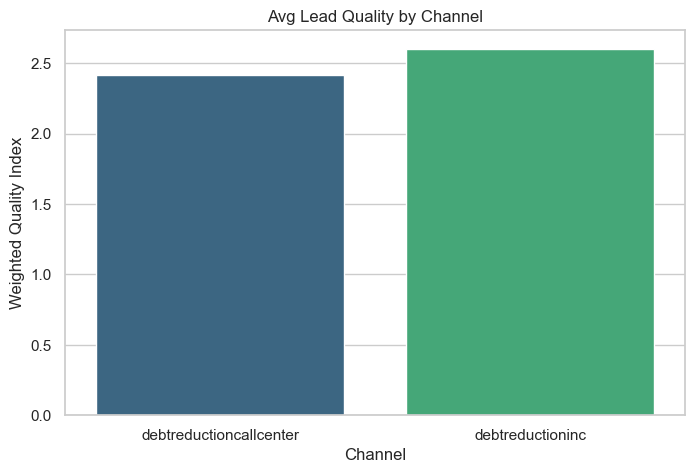

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\4264935554.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PublisherCampaignName', y='Pct_High', data=channel_table, palette='magma')


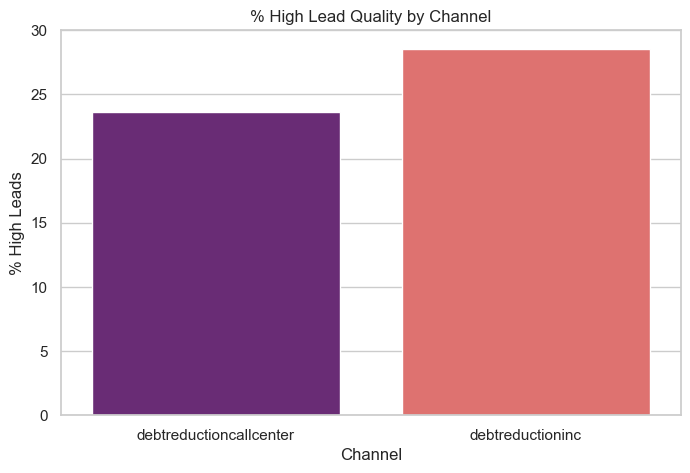

              AdvertiserCampaignName  TotalLeads  Weighted_Quality_Index  \
0  creditsolutions-branded-shortform         344                2.581395   
1            debt settlement1 master         529                2.580340   

   High   Pct_High  
0    93  27.034884  
1   151  28.544423  


C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\4264935554.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AdvertiserCampaignName', y='Weighted_Quality_Index', data=advertiser_table, palette='viridis')


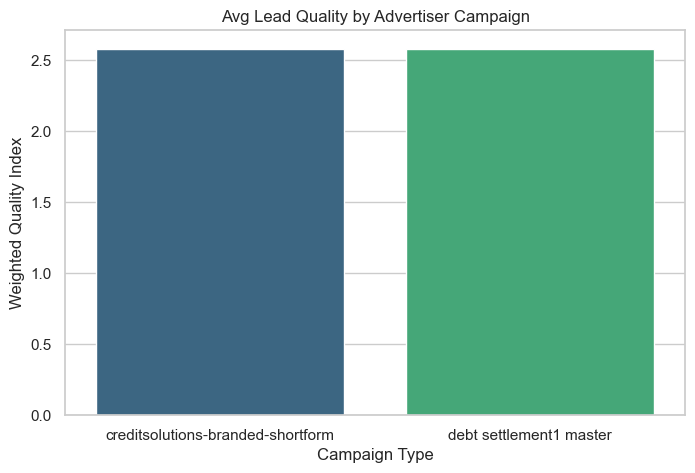

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\4264935554.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AdvertiserCampaignName', y='Pct_High', data=advertiser_table, palette='magma')


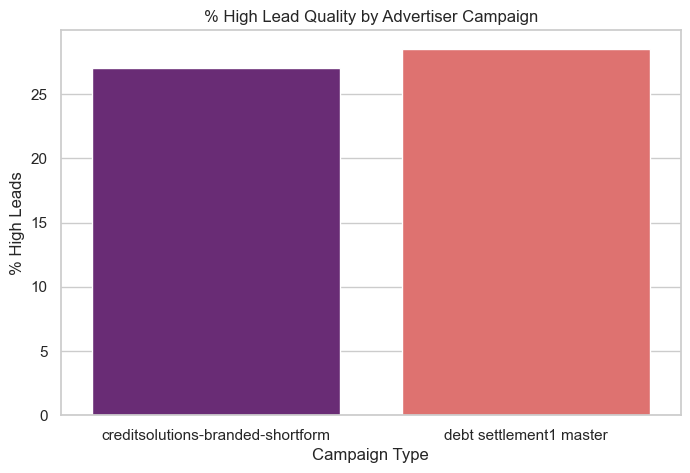

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\4264935554.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted_Quality_Index', y='ReferralDomain', data=top_partners, palette='coolwarm')


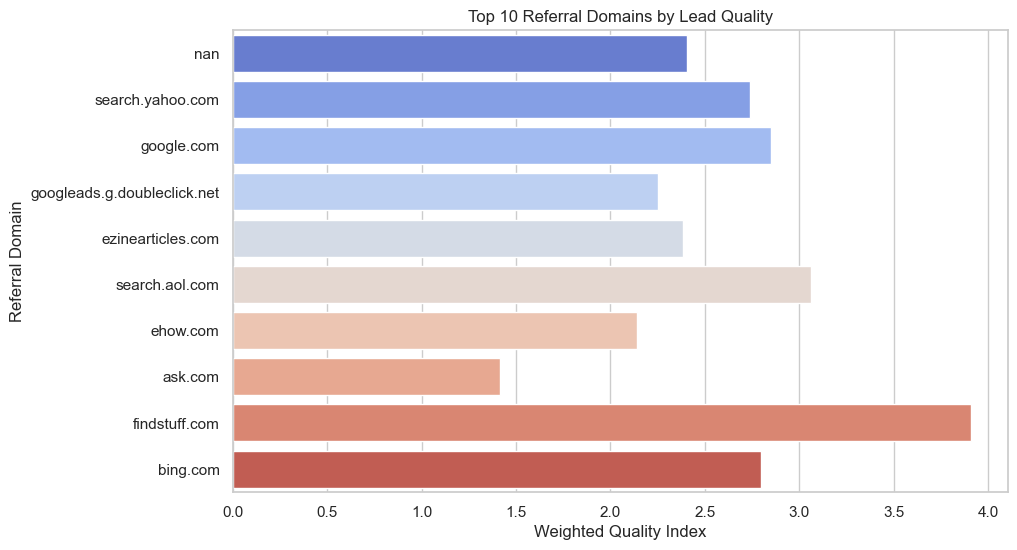

In [78]:
#1) PublisherCampaignName (Call Center vs Online Form)
#Create a driver table for PublisherCampaignName
channel_table = dataset_clean[dataset_clean['LeadQualityBucket'] != 'Unknown'] \
    .groupby('PublisherCampaignName').agg(
        TotalLeads=('VendorLeadID', 'count'),
        AvgLeadQualityScore=('LeadQualityScore', 'mean'),
        Weighted_Quality_Index=('LeadQualityScore', 'mean'),  # same as AvgLeadQualityScore
        High=('LeadQualityBucket', lambda x: (x=='High').sum()),
        MediumHigh=('LeadQualityBucket', lambda x: (x=='Medium-High').sum())
    ).reset_index()

# Calculate percentages
channel_table['Pct_High'] = (channel_table['High']/channel_table['TotalLeads'])*100
channel_table['Pct_MediumHigh'] = (channel_table['MediumHigh']/channel_table['TotalLeads'])*100

print(channel_table)

#Plot Bar chart for WQI avg
plt.figure(figsize=(8,5))
sns.barplot(x='PublisherCampaignName', y='Weighted_Quality_Index', data=channel_table, palette='viridis')
plt.title('Avg Lead Quality by Channel')
plt.ylabel('Weighted Quality Index')
plt.xlabel('Channel')
plt.show()

#Plot Bar chart for %High
plt.figure(figsize=(8,5))
sns.barplot(x='PublisherCampaignName', y='Pct_High', data=channel_table, palette='magma')
plt.title('% High Lead Quality by Channel')
plt.ylabel('% High Leads')
plt.xlabel('Channel')
plt.show()

#2) AdvertiserCampaign (Branded vs Generic)
#Driver table
advertiser_table = dataset_clean[dataset_clean['LeadQualityBucket'] != 'Unknown'] \
    .groupby('AdvertiserCampaignName').agg(
        TotalLeads=('VendorLeadID', 'count'),
        Weighted_Quality_Index=('LeadQualityScore', 'mean'),
        High=('LeadQualityBucket', lambda x: (x=='High').sum())
    ).reset_index()

advertiser_table['Pct_High'] = (advertiser_table['High']/advertiser_table['TotalLeads'])*100
print(advertiser_table)

#Plot WQI avg
plt.figure(figsize=(8,5))
sns.barplot(x='AdvertiserCampaignName', y='Weighted_Quality_Index', data=advertiser_table, palette='viridis')
plt.title('Avg Lead Quality by Advertiser Campaign')
plt.ylabel('Weighted Quality Index')
plt.xlabel('Campaign Type')
plt.show()

#Plot %High
plt.figure(figsize=(8,5))
sns.barplot(x='AdvertiserCampaignName', y='Pct_High', data=advertiser_table, palette='magma')
plt.title('% High Lead Quality by Advertiser Campaign')
plt.ylabel('% High Leads')
plt.xlabel('Campaign Type')
plt.show()

#3) Partner / Referral Domain (Top 10)
#Aggregate at partner/referral domain level
partner_table = dataset_clean[dataset_clean['LeadQualityBucket'] != 'Unknown'] \
    .groupby('ReferralDomain').agg(
        TotalLeads=('VendorLeadID', 'count'),
        Weighted_Quality_Index=('LeadQualityScore', 'mean')
    ).reset_index()

#Select top 10 by Total Leads
top_partners = partner_table.sort_values(by='TotalLeads', ascending=False).head(10)

#Horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Weighted_Quality_Index', y='ReferralDomain', data=top_partners, palette='coolwarm')
plt.title('Top 10 Referral Domains by Lead Quality')
plt.xlabel('Weighted Quality Index')
plt.ylabel('Referral Domain')
plt.show()

In [80]:
!pip install wordcloud

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3217595004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['LeadCreated'].dt.day_name()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3217595004.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalLeads', y='Keyword', data=keyword_driver, palette="Blues_r")


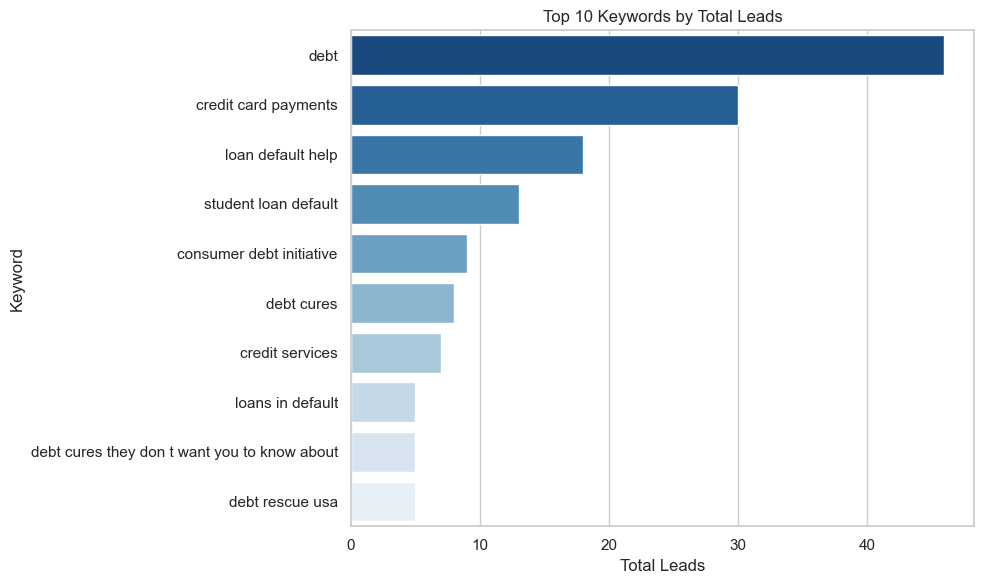

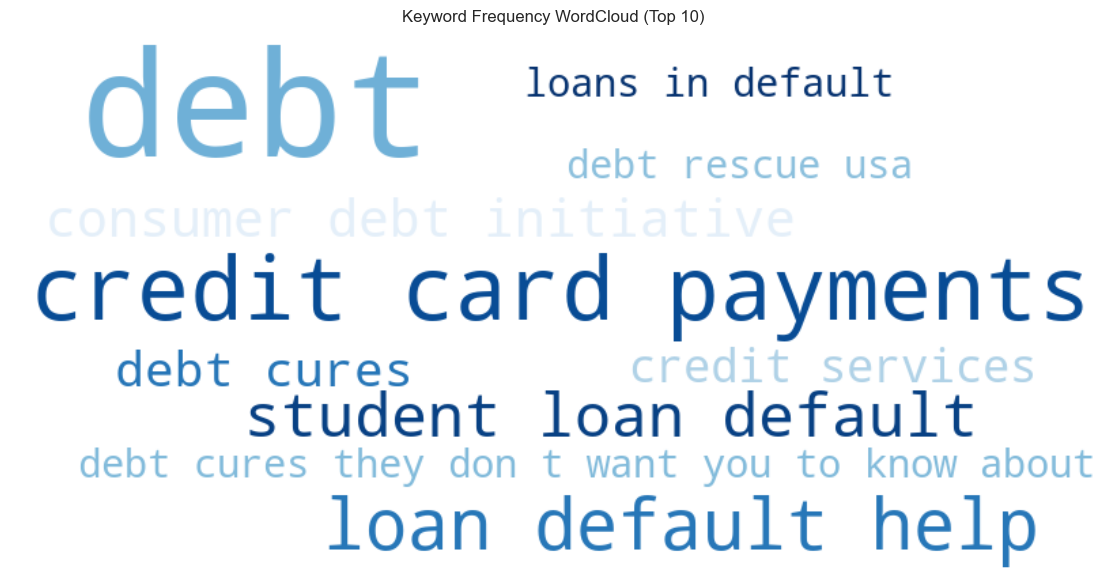

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3217595004.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AvgLeadQualityScore', y='LandingPageURL', data=landing_driver, palette="Greens_r")


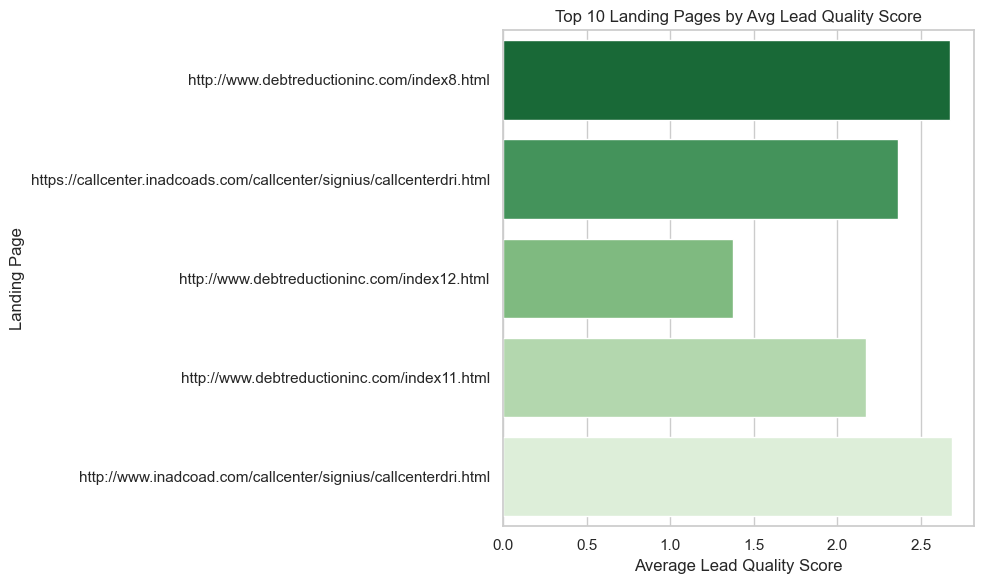

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\3217595004.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='AvgLeadQualityScore', data=state_driver, palette="Oranges_r")


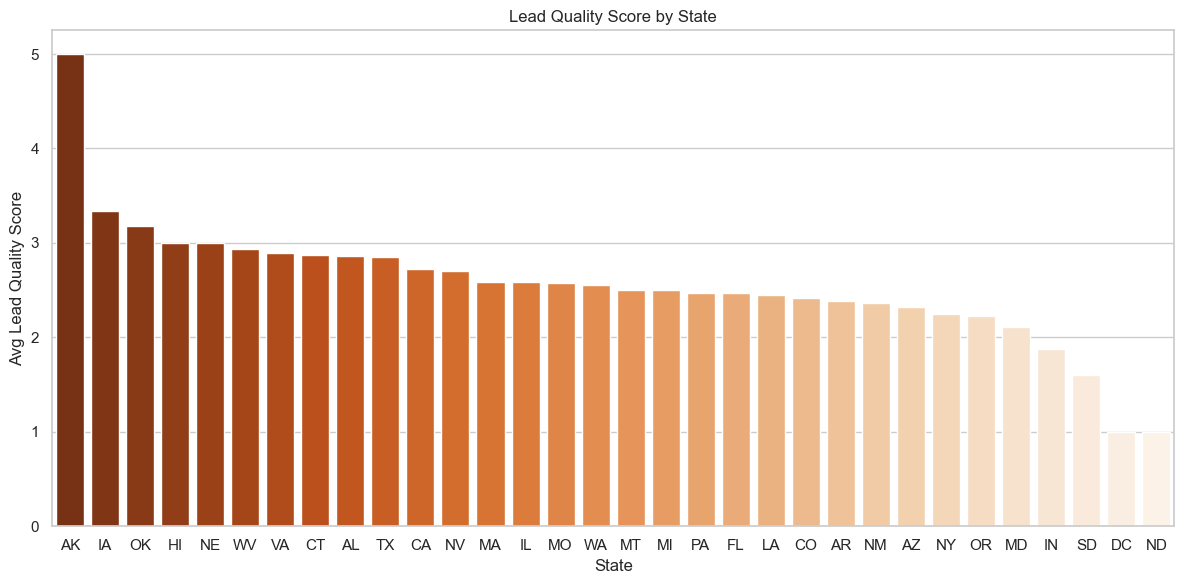

In [84]:
from wordcloud import WordCloud

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Filter dataset to remove unknown lead quality
df = dataset_clean[dataset_clean['LeadQualityBucket'] != 'Unknown']
df['DayOfWeek'] = df['LeadCreated'].dt.day_name()

# -------------------------------
# 1️) Keyword (Top 10 by Total Leads)
# -------------------------------
keyword_driver = (
    df.groupby('Keyword')
      .agg(TotalLeads=('VendorLeadID', 'count'),
           AvgLeadQualityScore=('LeadQualityScore', 'mean'))
      .reset_index()
      .sort_values('TotalLeads', ascending=False)
      .head(10)
)

# Horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='TotalLeads', y='Keyword', data=keyword_driver, palette="Blues_r")
plt.title("Top 10 Keywords by Total Leads")
plt.xlabel("Total Leads")
plt.ylabel("Keyword")
plt.tight_layout()
plt.savefig("keyword_total_leads.png")
plt.show()

# Optional WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Blues').generate_from_frequencies(
                          dict(zip(keyword_driver['Keyword'], keyword_driver['TotalLeads']))
                      )
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency WordCloud (Top 10)")
plt.tight_layout()
plt.savefig("keyword_wordcloud.png")
plt.show()

# -------------------------------
# 2️) Landing Page (Top 10)
# -------------------------------
landing_driver = (
    df.groupby('LandingPageURL')
      .agg(TotalLeads=('VendorLeadID', 'count'),
           AvgLeadQualityScore=('LeadQualityScore', 'mean'))
      .reset_index()
      .sort_values('TotalLeads', ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x='AvgLeadQualityScore', y='LandingPageURL', data=landing_driver, palette="Greens_r")
plt.title("Top 10 Landing Pages by Avg Lead Quality Score")
plt.xlabel("Average Lead Quality Score")
plt.ylabel("Landing Page")
plt.tight_layout()
plt.savefig("landingpage_avg_wqi.png")
plt.show()

# -------------------------------
# 3️) State (Optional)
# -------------------------------
state_driver = (
    df.groupby('State')
      .agg(TotalLeads=('VendorLeadID', 'count'),
           AvgLeadQualityScore=('LeadQualityScore', 'mean'))
      .reset_index()
      .sort_values('AvgLeadQualityScore', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x='State', y='AvgLeadQualityScore', data=state_driver, palette="Oranges_r")
plt.title("Lead Quality Score by State")
plt.xlabel("State")
plt.ylabel("Avg Lead Quality Score")
plt.tight_layout()
plt.savefig("state_avg_wqi.png")
plt.show()

In [88]:
df.columns

Index(['LeadCreated', 'FirstName', 'Email', 'VendorLeadID', 'CallStatus',
       'WidgetName', 'PublisherZoneName', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'Partner', 'ReferralDomain', 'MarketingCampaign',
       'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters', 'VendorLeadID_Anomaly', 'UserKey',
       'RepeatedUser', 'LeadQualityBucket', 'LeadQualityScore',
       'GoodQualityLead', 'WidgetSize', 'Widget_Fieldset', 'Widget_FormType',
       'Widget_Design', 'Widget_BGColor', 'LeadSourceType', 'BrandingType',
       'AddressScore_Category', 'PhoneScore_Category', 'TrafficType',
       'ReferralURL_Clean', 'DayOfWeek', 'Weekend'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\381284851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\381284851.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DayOfWeek')
C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\381284851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

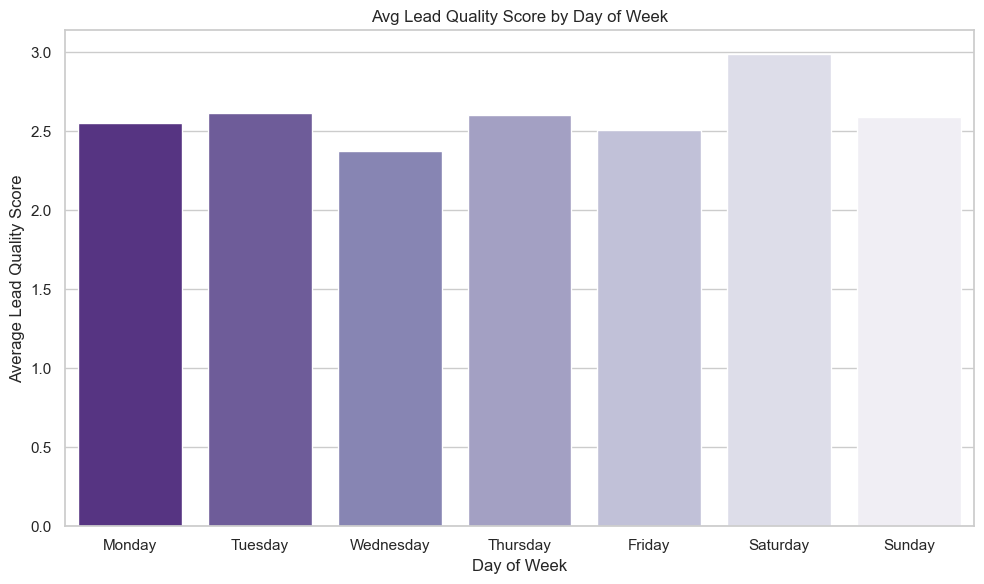

In [85]:
# 4️) DayOfWeek
# -------------------------------
# Ensure proper order of days
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

dayofweek_driver = (
    df.groupby('DayOfWeek')
      .agg(TotalLeads=('VendorLeadID', 'count'),
           AvgLeadQualityScore=('LeadQualityScore', 'mean'))
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x='DayOfWeek', y='AvgLeadQualityScore', data=dayofweek_driver, palette="Purples_r")
plt.title("Avg Lead Quality Score by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Lead Quality Score")
plt.tight_layout()
plt.savefig("dayofweek_avg_wqi.png")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\471356626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekend', y='Weighted_Quality_Index', data=weekend_df, palette='pastel')


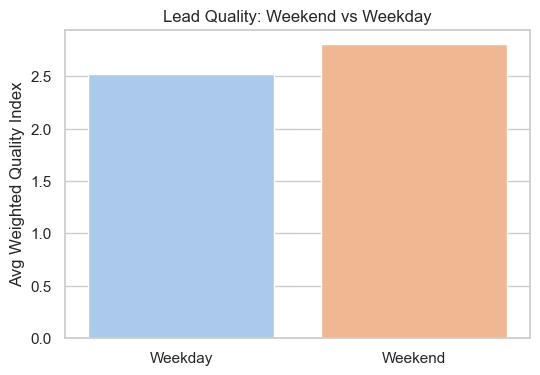

In [92]:
#Weekend vs Weekday Lead Quality
df_weekend = df[df['LeadQualityBucket'] != 'Unknown'].copy()

weekend_df = df_weekend.groupby('Weekend').agg(
    TotalLeads=('VendorLeadID', 'count'),
    Weighted_Quality_Index=('LeadQualityScore', 'mean')
).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Weekend', y='Weighted_Quality_Index', data=weekend_df, palette='pastel')
plt.title('Lead Quality: Weekend vs Weekday')
plt.ylabel('Avg Weighted Quality Index')
plt.xlabel('')
plt.show()


In [95]:
print(df_brand.dtypes)
print(df_brand[['LeadQualityScore', 'BrandingType', 'LeadCreated']].head(10))

LeadCreated                    datetime64[ns]
FirstName                              object
Email                                  object
VendorLeadID                           object
CallStatus                             object
WidgetName                             object
PublisherZoneName                      object
PublisherCampaignName                  object
AddressScore                          float64
PhoneScore                            float64
AdvertiserCampaignName                 object
State                                  object
DebtLevel                              object
Partner                                object
ReferralDomain                         object
MarketingCampaign                      object
AdGroup                                object
Keyword                                object
SearchQuery                            object
ReferralURL                            object
ReferralURL Parameters                 object
LandingPageURL                    

In [96]:
# Remove 'Unknown' lead quality
df_brand = df_brand[df_brand['LeadQualityBucket'] != 'Unknown'].copy()

# Ensure LeadQualityScore is numeric
df_brand['LeadQualityScore'] = pd.to_numeric(df_brand['LeadQualityScore'], errors='coerce')
df_brand = df_brand.dropna(subset=['LeadQualityScore'])  # drop rows with invalid scores

# Ensure BrandingType is clean string
df_brand['BrandingType'] = df_brand['BrandingType'].astype(str).str.strip()

# Ensure LeadCreated is datetime
df_brand['LeadCreated'] = pd.to_datetime(df_brand['LeadCreated'], errors='coerce')
df_brand = df_brand.dropna(subset=['LeadCreated'])


In [98]:
# Extract month as string to avoid Period type issues
df_brand['Month'] = df_brand['LeadCreated'].dt.to_period('M').astype(str)

# Aggregate by month and branding type
brand_trend = df_brand.groupby(['Month', 'BrandingType'], as_index=False).agg(
    AvgLeadQuality=('LeadQualityScore', 'mean'),
    TotalLeads=('VendorLeadID', 'count')
)

In [99]:
print(brand_trend.dtypes)
print(brand_trend.head())

Month              object
BrandingType       object
AvgLeadQuality    float64
TotalLeads          int64
dtype: object
     Month BrandingType  AvgLeadQuality  TotalLeads
0  2009-04      branded        3.121212          33
1  2009-04      generic        3.078431         102
2  2009-05      branded        2.673469          49
3  2009-05      generic        2.909091          66
4  2009-06      branded        2.490000         100


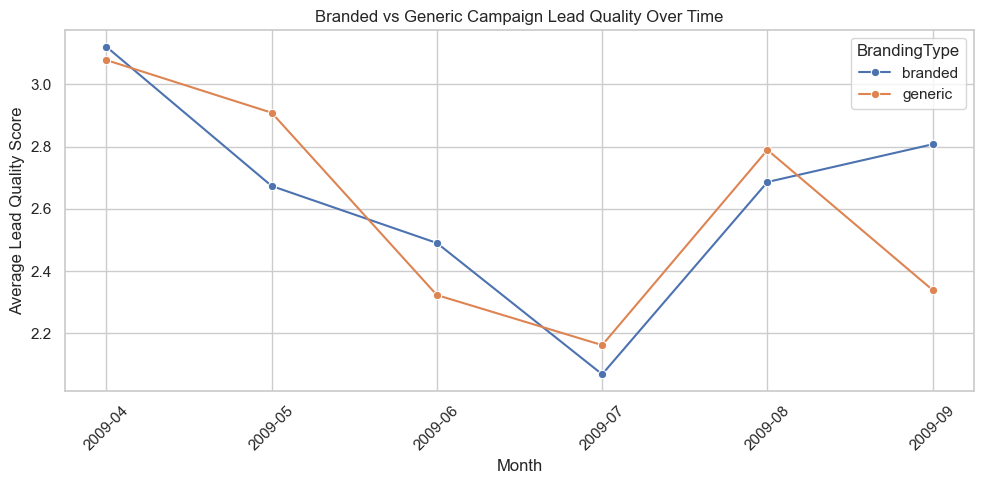

In [100]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=brand_trend,
    x='Month',
    y='AvgLeadQuality',
    hue='BrandingType',
    marker='o'
)
plt.xticks(rotation=45)
plt.ylabel('Average Lead Quality Score')
plt.title('Branded vs Generic Campaign Lead Quality Over Time')
plt.tight_layout()
plt.show()

In [105]:
# List of driver columns
driver_columns = [
    'PublisherZoneName',
    'Widget_FormType',
    'Widget_Design',
    'Widget_BGColor',
    'PublisherCampaignName',
    'AdvertiserCampaignName',
    'Partner',  # or 'ReferralDomain'
    'Keyword',
    'LandingPageURL',
    'State',
    'DayOfWeek'
]

# Dictionary to store tables
driver_tables = {}

# Recreate driver tables
for col in driver_columns:
    try:
        driver_tables[col] = build_driver_table(dataset_clean, col)
        print(f"Created driver table for {col}")
    except Exception as e:
        print(f"Skipped {col} due to: {e}")

# Combine all tables into a single summary
numeric_cols = [
    'TotalLeads', 'AvgLeadQualityScore', 'Weighted_Quality_Index',
    'Pct_High', 'Pct_MediumHigh', 'Pct_Medium', 'Pct_MediumLow', 'Pct_Low'
]

formatted_tables = []

for category, df in driver_tables.items():
    if df is None or df.empty:
        continue
    segment_col = df.columns[0]
    df_renamed = df[numeric_cols].copy()
    df_renamed['Segment'] = df[segment_col]
    df_renamed['Category'] = category
    df_renamed = df_renamed[['Category', 'Segment'] + numeric_cols]
    formatted_tables.append(df_renamed)

final_summary_table = pd.concat(formatted_tables, axis=0, ignore_index=True)
final_summary_table = final_summary_table.sort_values(by='Weighted_Quality_Index', ascending=False)

# Export each driver table to separate sheets in an Excel file
with pd.ExcelWriter('Driver_Summary_Tables.xlsx') as writer:
    for category, df in driver_tables.items():
        if df is not None and not df.empty:
            df.to_excel(writer, sheet_name=category[:31], index=False)  # Excel sheet names max 31 chars
    final_summary_table.to_excel(writer, sheet_name='Combined_Summary', index=False)

print("All driver tables and summary table exported to 'Driver_Summary_Tables.xlsx'")


Created driver table for PublisherZoneName
Created driver table for Widget_FormType
Created driver table for Widget_Design
Created driver table for Widget_BGColor
Created driver table for PublisherCampaignName
Created driver table for AdvertiserCampaignName
Created driver table for Partner
Created driver table for Keyword
Created driver table for LandingPageURL
Created driver table for State
Skipped DayOfWeek due to: 'DayOfWeek'
All driver tables and summary table exported to 'Driver_Summary_Tables.xlsx'


C:\Users\Admin\AppData\Local\Temp\ipykernel_18184\1101845789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_agg, x='Category', y='AvgLeadQuality', palette='viridis')


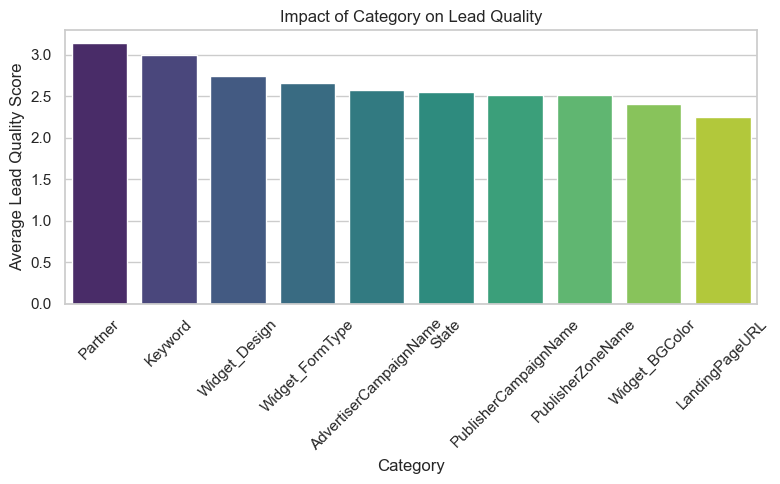

In [110]:
# Aggregate AvgLeadQualityScore or WQI by Category
category_agg = final_summary_table.groupby('Category').agg(
    AvgLeadQuality=('Weighted_Quality_Index', 'mean')
).reset_index()

# Sort categories by AvgLeadQuality
category_agg = category_agg.sort_values('AvgLeadQuality', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=category_agg, x='Category', y='AvgLeadQuality', palette='viridis')
plt.ylabel('Average Lead Quality Score')
plt.xlabel('Category')
plt.title('Impact of Category on Lead Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [111]:
final_summary_table.columns

Index(['Category', 'Segment', 'TotalLeads', 'AvgLeadQualityScore',
       'Weighted_Quality_Index', 'Pct_High', 'Pct_MediumHigh', 'Pct_Medium',
       'Pct_MediumLow', 'Pct_Low'],
      dtype='object')

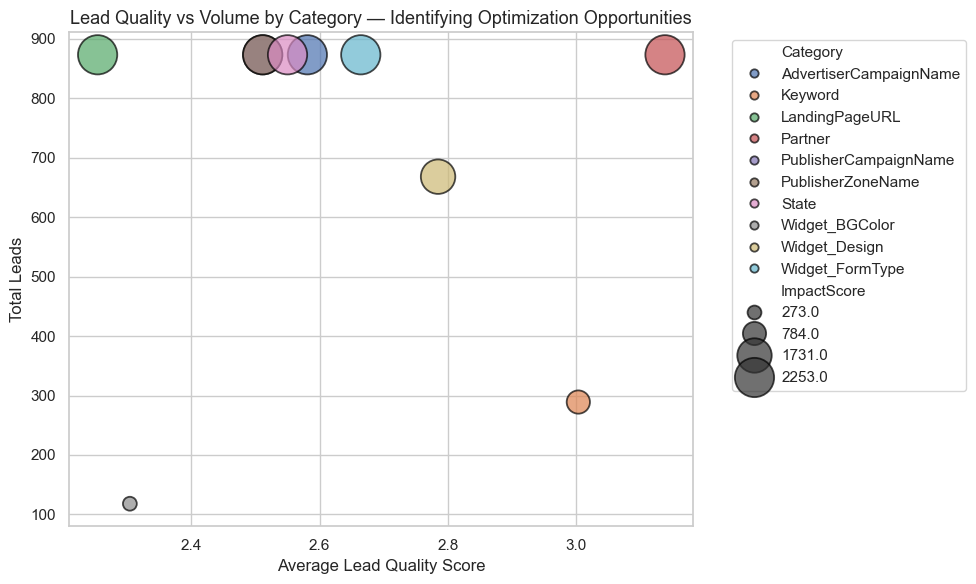

In [112]:
summary = final_summary_table.copy()

summary = summary[~summary['Segment'].isin(['Unknown', '', None])]

#Calculate impact score (importance = lead count × quality)
summary['ImpactScore'] = summary['AvgLeadQualityScore'] * summary['TotalLeads']

#Aggregate by category level (to see which broad areas drive quality)
category_summary = summary.groupby('Category').agg({
    'TotalLeads': 'sum',
    'AvgLeadQualityScore': 'mean',
    'Weighted_Quality_Index': 'mean',
    'ImpactScore': 'sum'
}).reset_index()

#Visualization — which categories matter most
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=category_summary,
    x='AvgLeadQualityScore',
    y='TotalLeads',
    size='ImpactScore',
    hue='Category',
    sizes=(100, 800),
    alpha=0.7,
    edgecolor='black'
)

plt.title("Lead Quality vs Volume by Category — Identifying Optimization Opportunities", fontsize=13)
plt.xlabel("Average Lead Quality Score")
plt.ylabel("Total Leads")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()